# Functions for Plotting

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
VariantNames = ['Base','FixedRandomSample','ProportionalRandomSample','Agglomerative','RandomParameters']
ValidFunctions = list(range(1,10))+list(range(20,28))

In [3]:
def TableMediansIterations(DimensionNumber,Tolerance):
    data_medians_iterations = dict()
    for number_function in ValidFunctions:
        iterations_variants = list(IterationsVariants(DimensionNumber,number_function,Tolerance))
        data_medians_iterations[f"F{number_function}"] = iterations_variants
    return data_medians_iterations

def IterationsVariants(DimensionNumber,NumberFunction,Tolerance):
    optimal_value = -(NumberFunction*100+Tolerance)
    for variant_name in VariantNames:
        data_optimal_values = np.loadtxt(f"Dim_{DimensionNumber}/{variant_name}/OptimalValues_F{NumberFunction}.csv",dtype=float,delimiter=',')
        medians_optimal = -np.median(data_optimal_values,axis=0)

        yield medians_optimal.searchsorted(optimal_value)

In [4]:
def Plot_VariantResults(NumberFunction,FunctionEvaluations_Generation,DimensionNumber=2,Y_Scale='linear'):
    fig , axes = plt.subplots(5,figsize=(8,20),subplot_kw={'yscale':Y_Scale,'xlabel':'Function Evaluations','ylabel':'Function Value'},layout='tight')

    for index_variant , variant_name in enumerate(VariantNames):
        data_optimal_values = np.loadtxt(f"Dim_{DimensionNumber}/{variant_name}/OptimalValues_F{NumberFunction}.csv",dtype=float,delimiter=',')
        Plot_FunctionValues(data_optimal_values,FunctionEvaluations_Generation,variant_name,axes[index_variant])

def Plot_FunctionValues(DataOptimalValues,FunctionEvaluations_Generation,VariantName,Axes):
    data_optimal_plot = DataOptimalValues[:,::FunctionEvaluations_Generation]
    generation = np.zeros(data_optimal_plot.shape[0])

    for generation_optimal_values in data_optimal_plot.T:
        sns.scatterplot(x=generation,y=generation_optimal_values,color='red',alpha=0.005,ax=Axes)
        generation += FunctionEvaluations_Generation

    Axes.set_title(VariantName)

In [28]:
def Plot_Min50Max(NumberFunction,FunctionEvaluations_Generation,DimensionNumber=2,Y_Scale='linear'):
    fig , axes = plt.subplots(5,figsize=(8,20),subplot_kw={'yscale':Y_Scale,'xlabel':'Function Evaluations','ylabel':'Function Value'},layout='tight')

    for axes_variant , variant_name in zip(axes,VariantNames):
        dataset_results = np.loadtxt(f"Dim_{DimensionNumber}/{variant_name}/OptimalValues_F{NumberFunction}.csv",dtype=float,delimiter=',')
        min_results = np.min(dataset_results,axis=0)[::FunctionEvaluations_Generation]
        meadian_results = np.median(dataset_results,axis=0)[::FunctionEvaluations_Generation]
        max_results = np.max(dataset_results,axis=0)[::FunctionEvaluations_Generation]

        index_results = np.arange(dataset_results.shape[1],step=FunctionEvaluations_Generation)
        sns.scatterplot(x=index_results,y=min_results,ax=axes_variant)
        sns.scatterplot(x=index_results,y=meadian_results,ax=axes_variant)
        sns.scatterplot(x=index_results,y=max_results,ax=axes_variant)
    
        axes_variant.set_title(variant_name)

# Iteration at Which the Minimum is Reached

In [5]:
DataMediansIterations = TableMediansIterations(2,1)

In [6]:
pd.DataFrame(DataMediansIterations,index=VariantNames).T

Base  FixedRandomSample  ProportionalRandomSample  Agglomerative  \
F1   4127               3102                      3514           2835   
F2   1148               1135                      1124           1165   
F3      0                  0                         0              0   
F4   2440               2432                      2484           2157   
F5      0                  0                         0              0   
F6   5001               5001                      5001           5001   
F7   2257               2236                      2254           2063   
F8      0                  0                         0              0   
F9   5001               4128                      5001           3832   
F20  3736               2988                      3209           2569   
F21  5001               5001                      5001           5001   
F22  3279               2892                      2991           2338   
F23  5001               5001                      5001           5001   
F24  5001               5001                      5001           5001   
F25  3729               2882                      3218           2513   
F26  2522               2605                      2602           2015   
F27  3518               2888                      3124           2501   

     RandomParameters  
F1               4168  
F2               1130  
F3                  0  
F4               2497  
F5                  0  
F6               5001  
F7               2138  
F8                  0  
F9               5001  
F20              3714  
F21              5001  
F22              3242  
F23              5001  
F24              5001  
F25              3704  
F26              2514  
F27              3509

# F1

In [30]:
NumberFunction = 1
FunctionEvaluations = 100

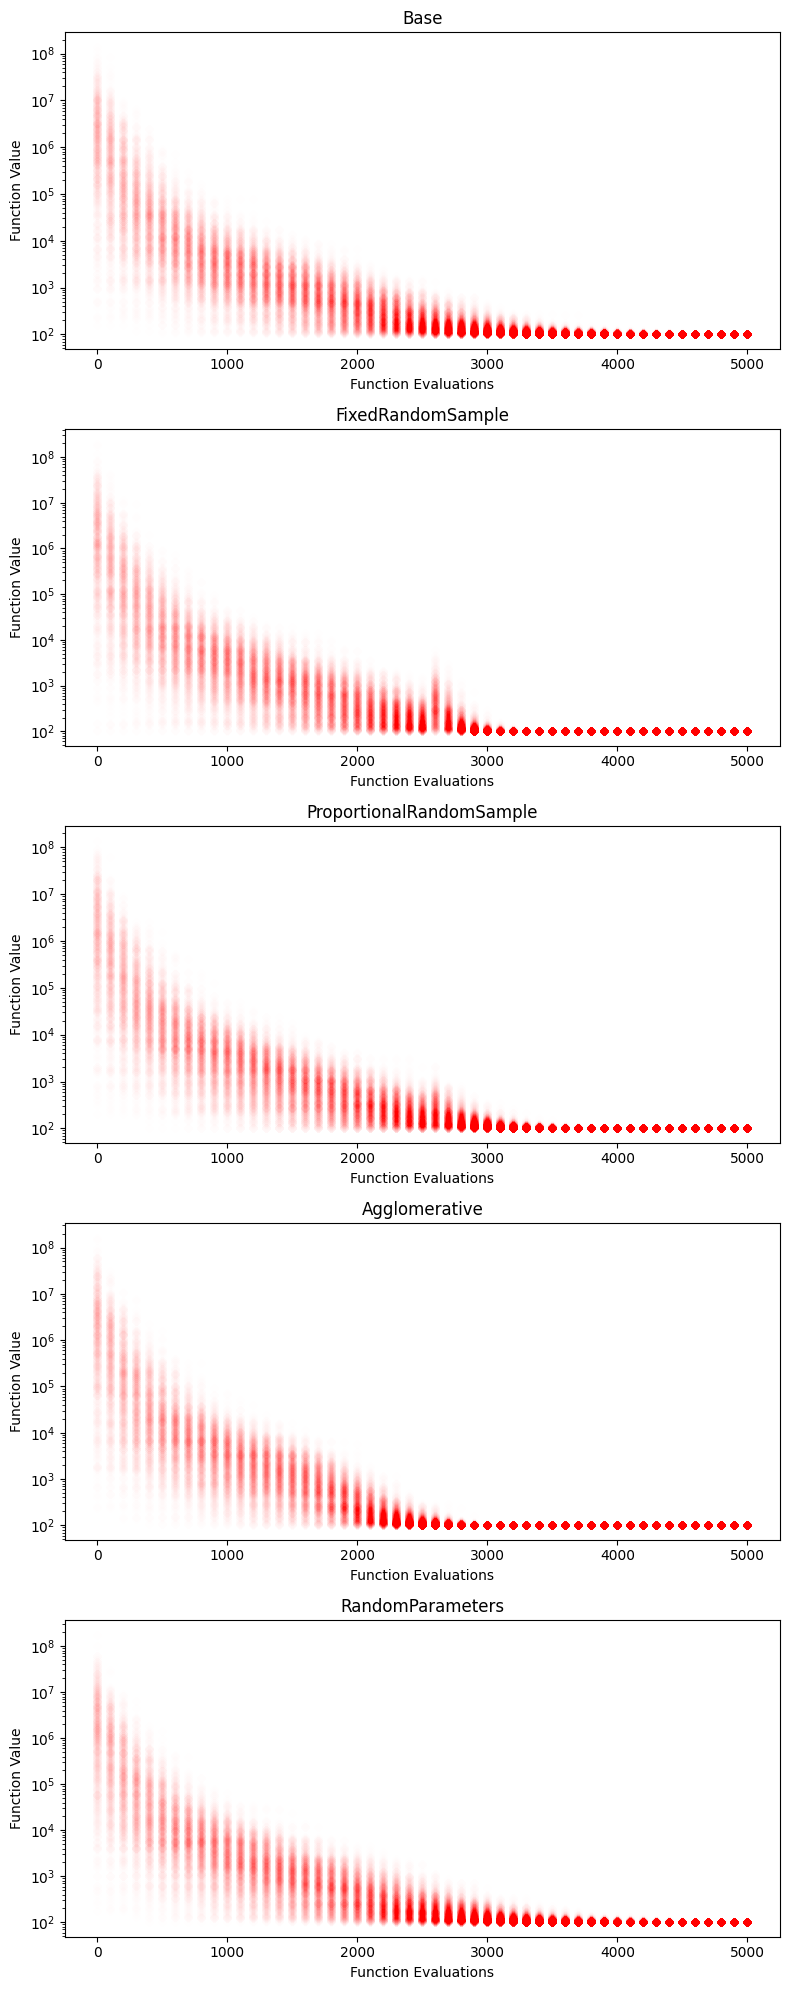

In [31]:
Plot_VariantResults(NumberFunction,FunctionEvaluations,Y_Scale='log')

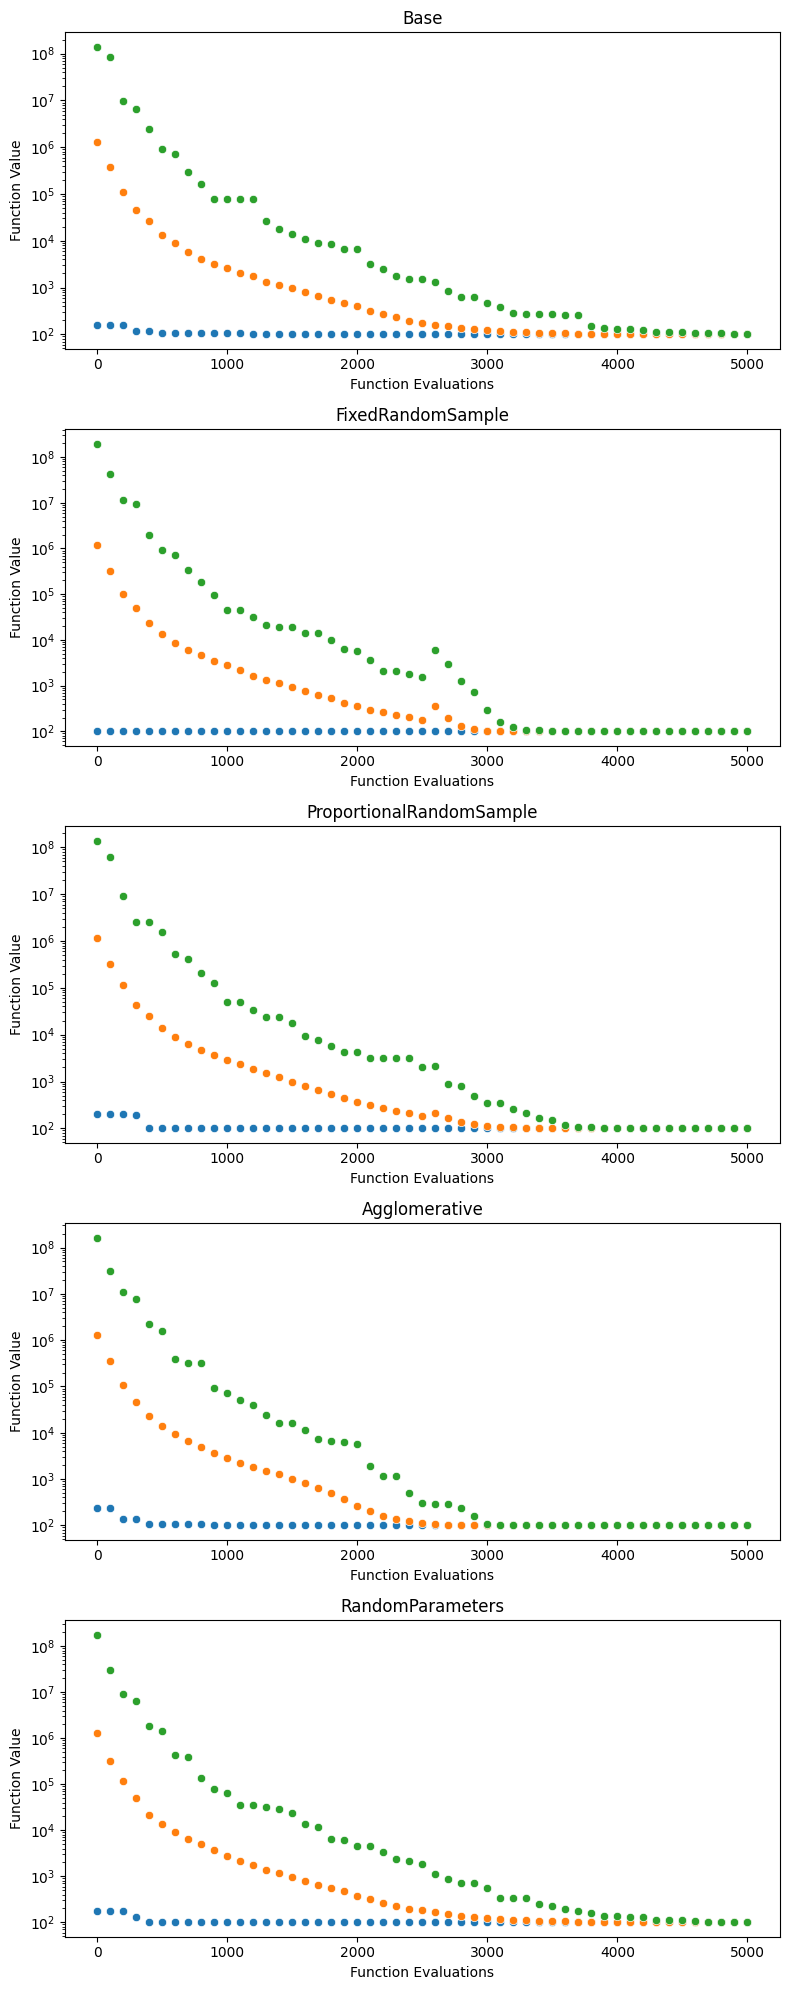

In [32]:
Plot_Min50Max(NumberFunction,FunctionEvaluations,Y_Scale='log')

# F2

In [ ]:
NumberFunction = 2
FunctionEvaluations = 100

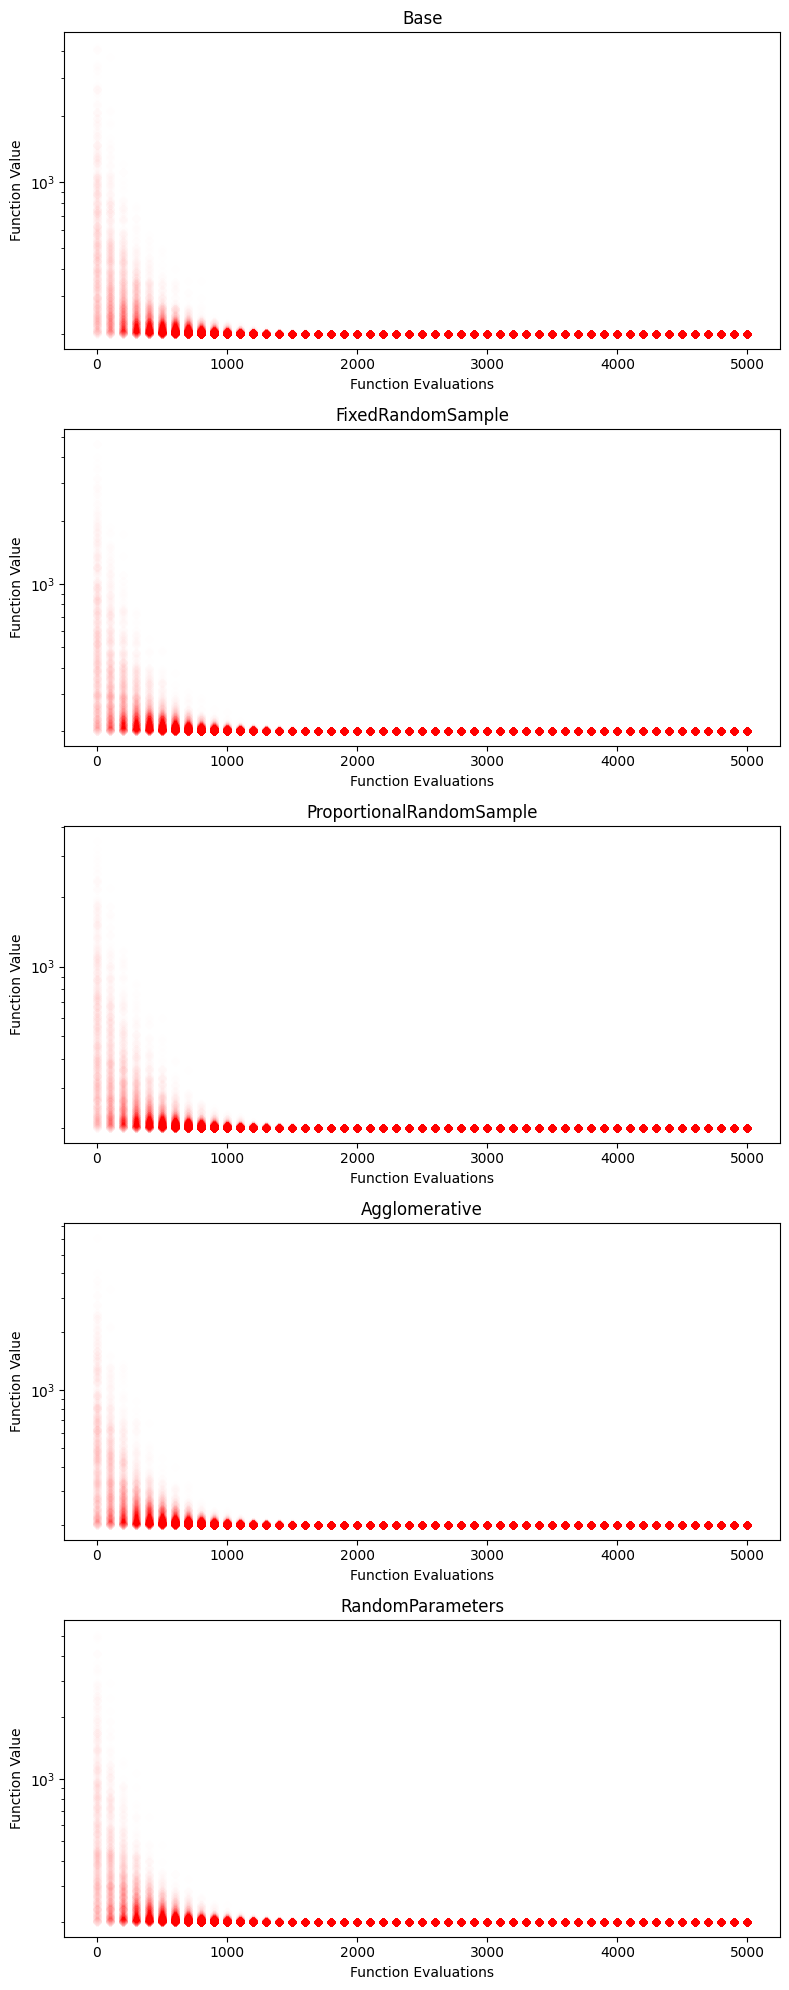

In [ ]:
Plot_VariantResults(NumberFunction,FunctionEvaluations,Y_Scale='log')

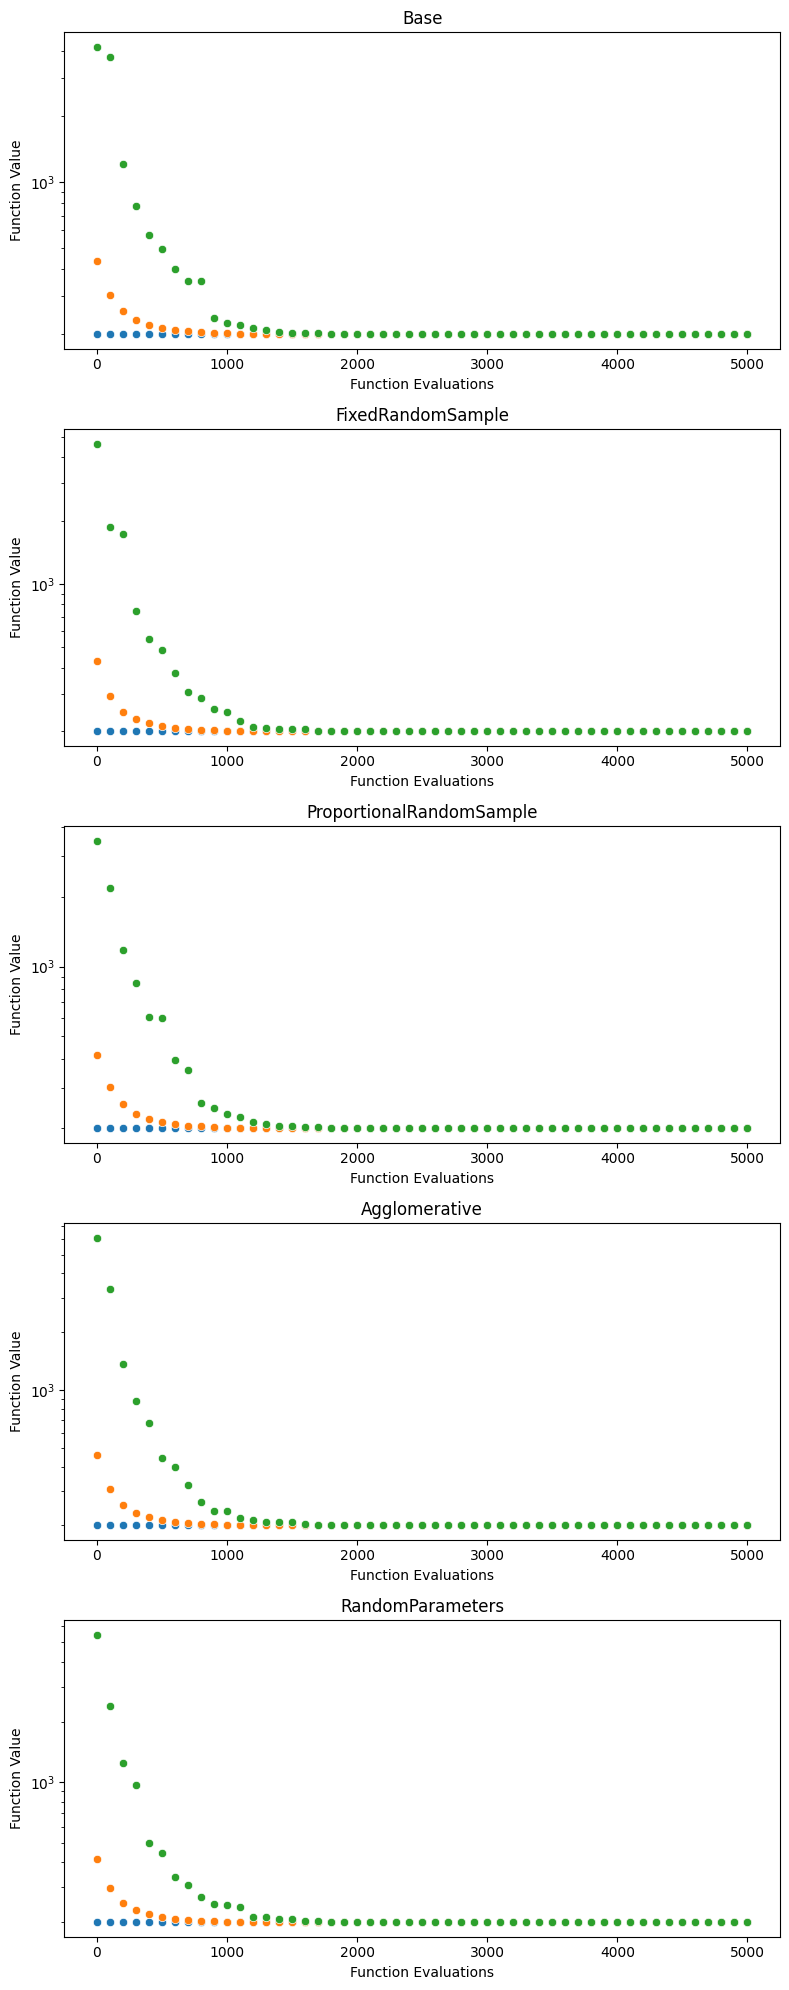

In [34]:
Plot_Min50Max(NumberFunction,FunctionEvaluations,Y_Scale='log')

# F3

In [35]:
NumberFunction = 3
FunctionEvaluations = 100

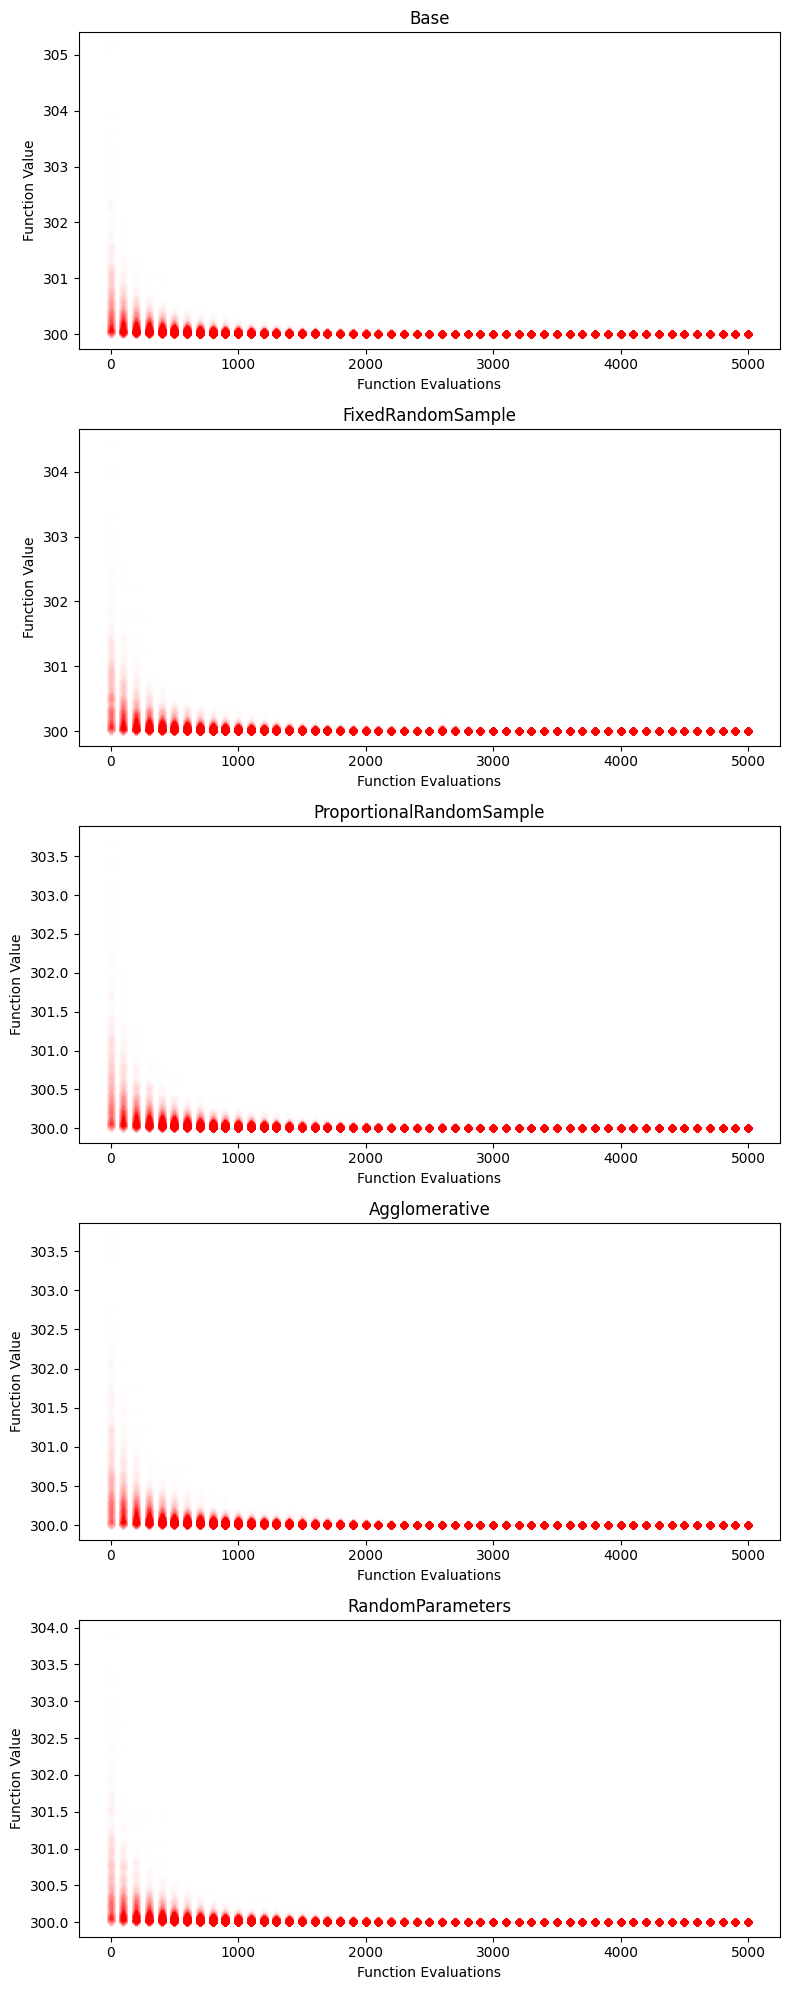

In [ ]:
Plot_VariantResults(NumberFunction,FunctionEvaluations)

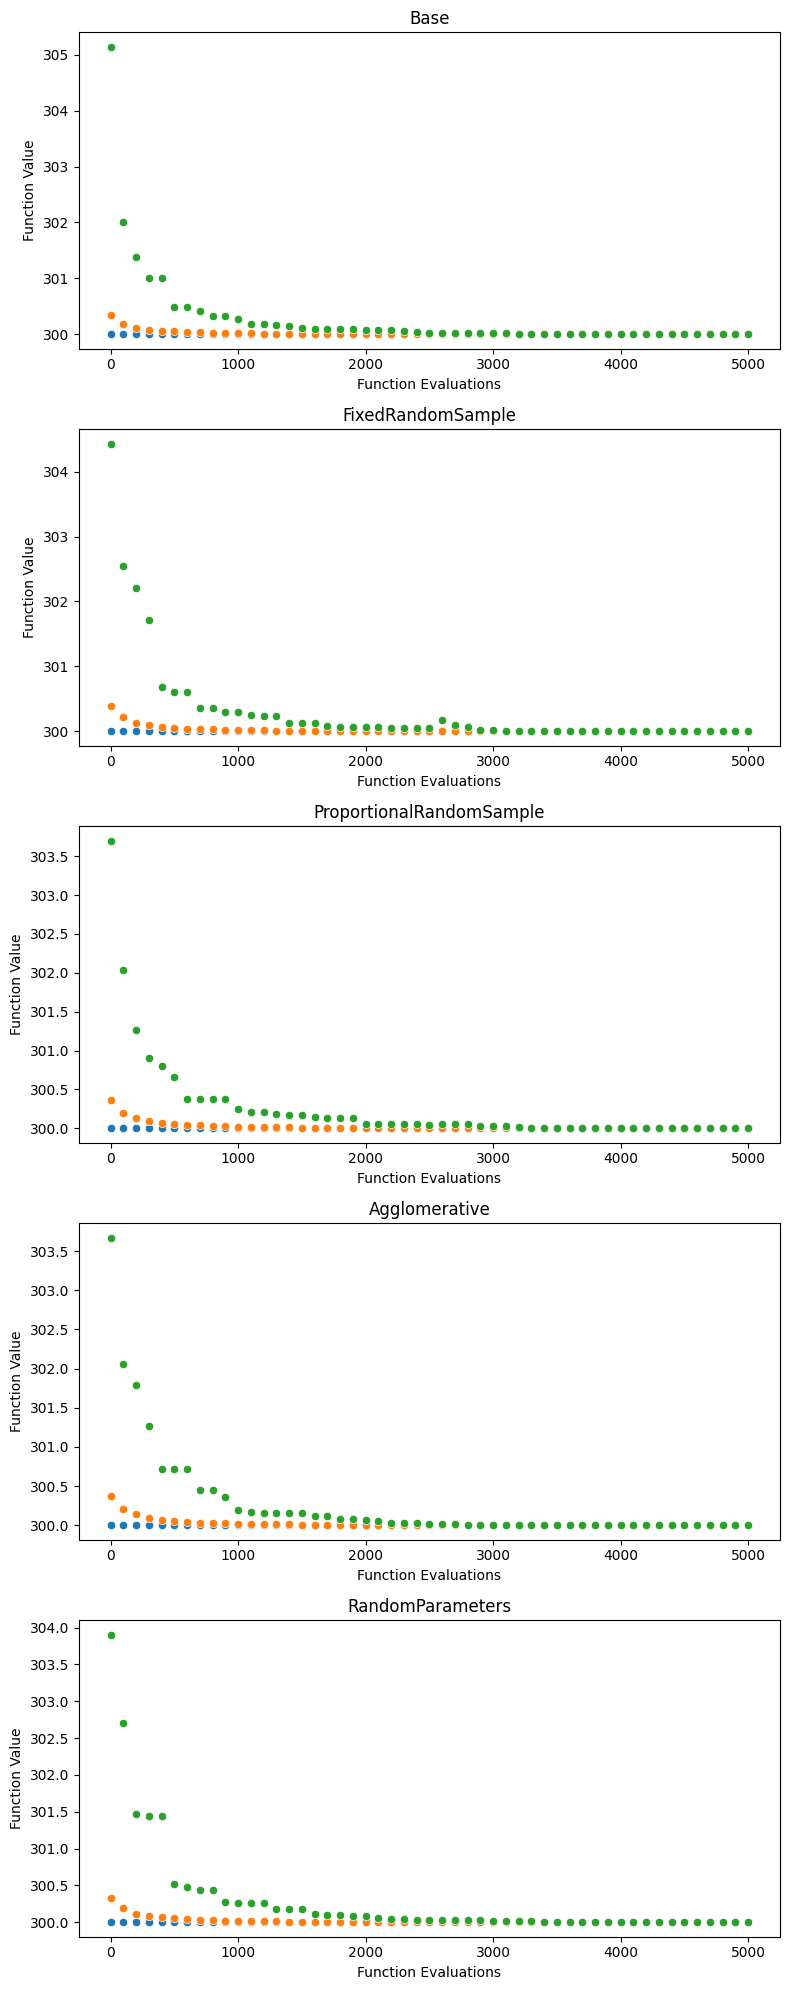

In [36]:
Plot_Min50Max(NumberFunction,FunctionEvaluations)

# F4

In [37]:
NumberFunction = 4
FunctionEvaluations = 100

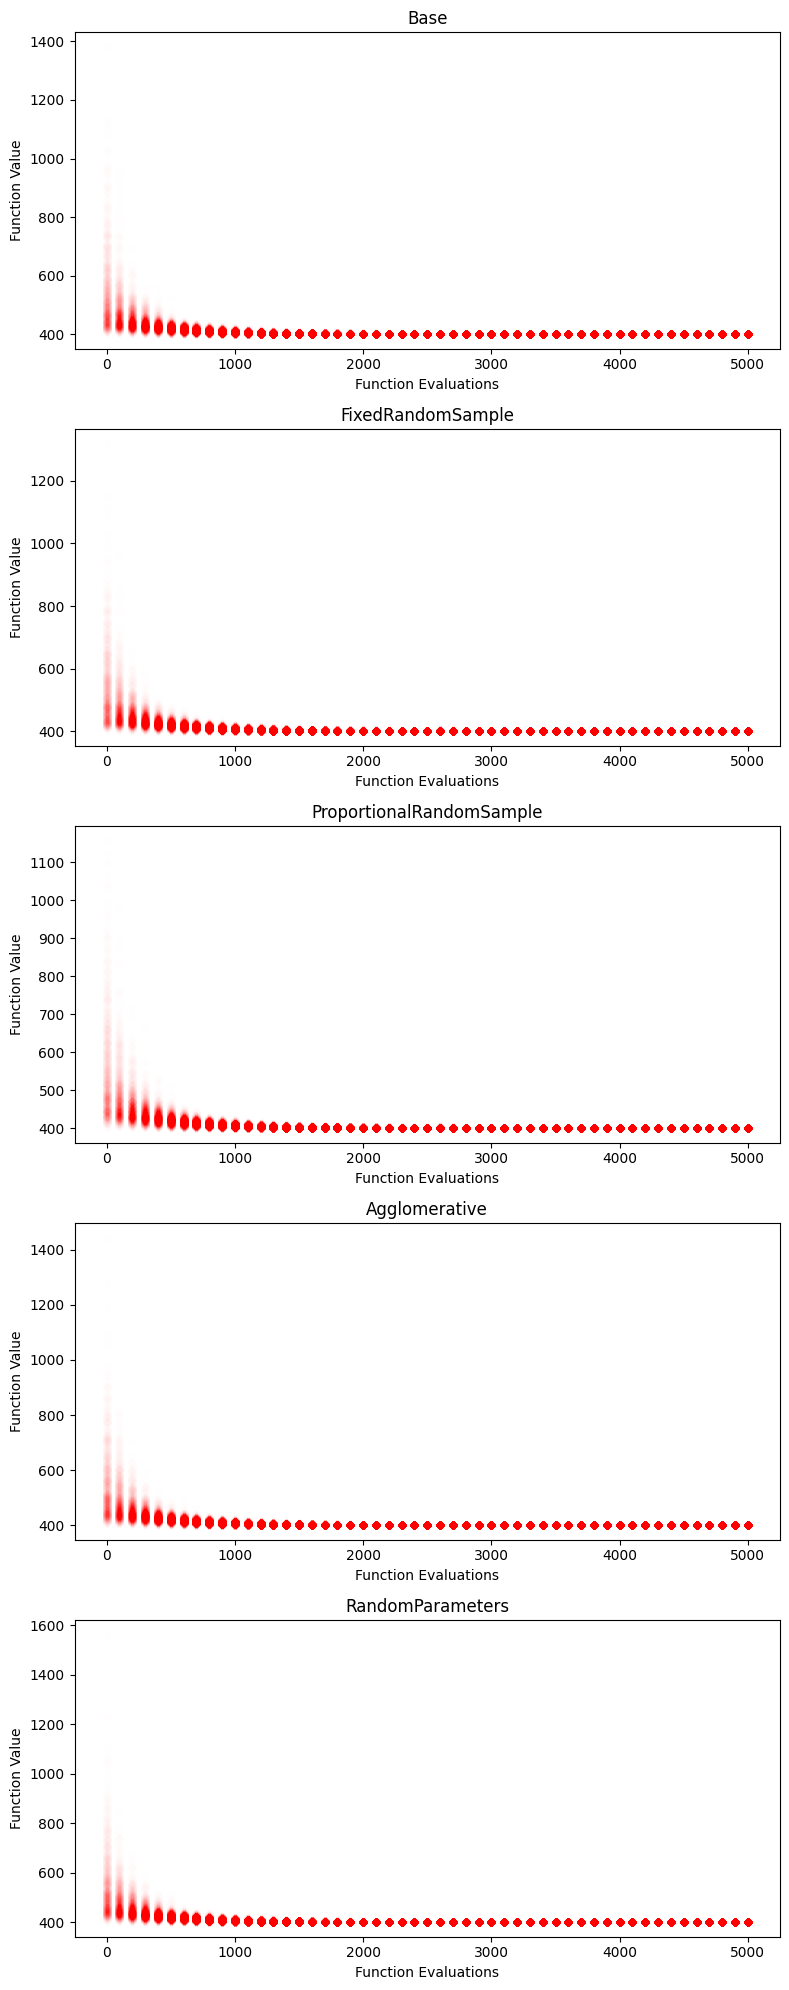

In [38]:
Plot_VariantResults(NumberFunction,FunctionEvaluations)

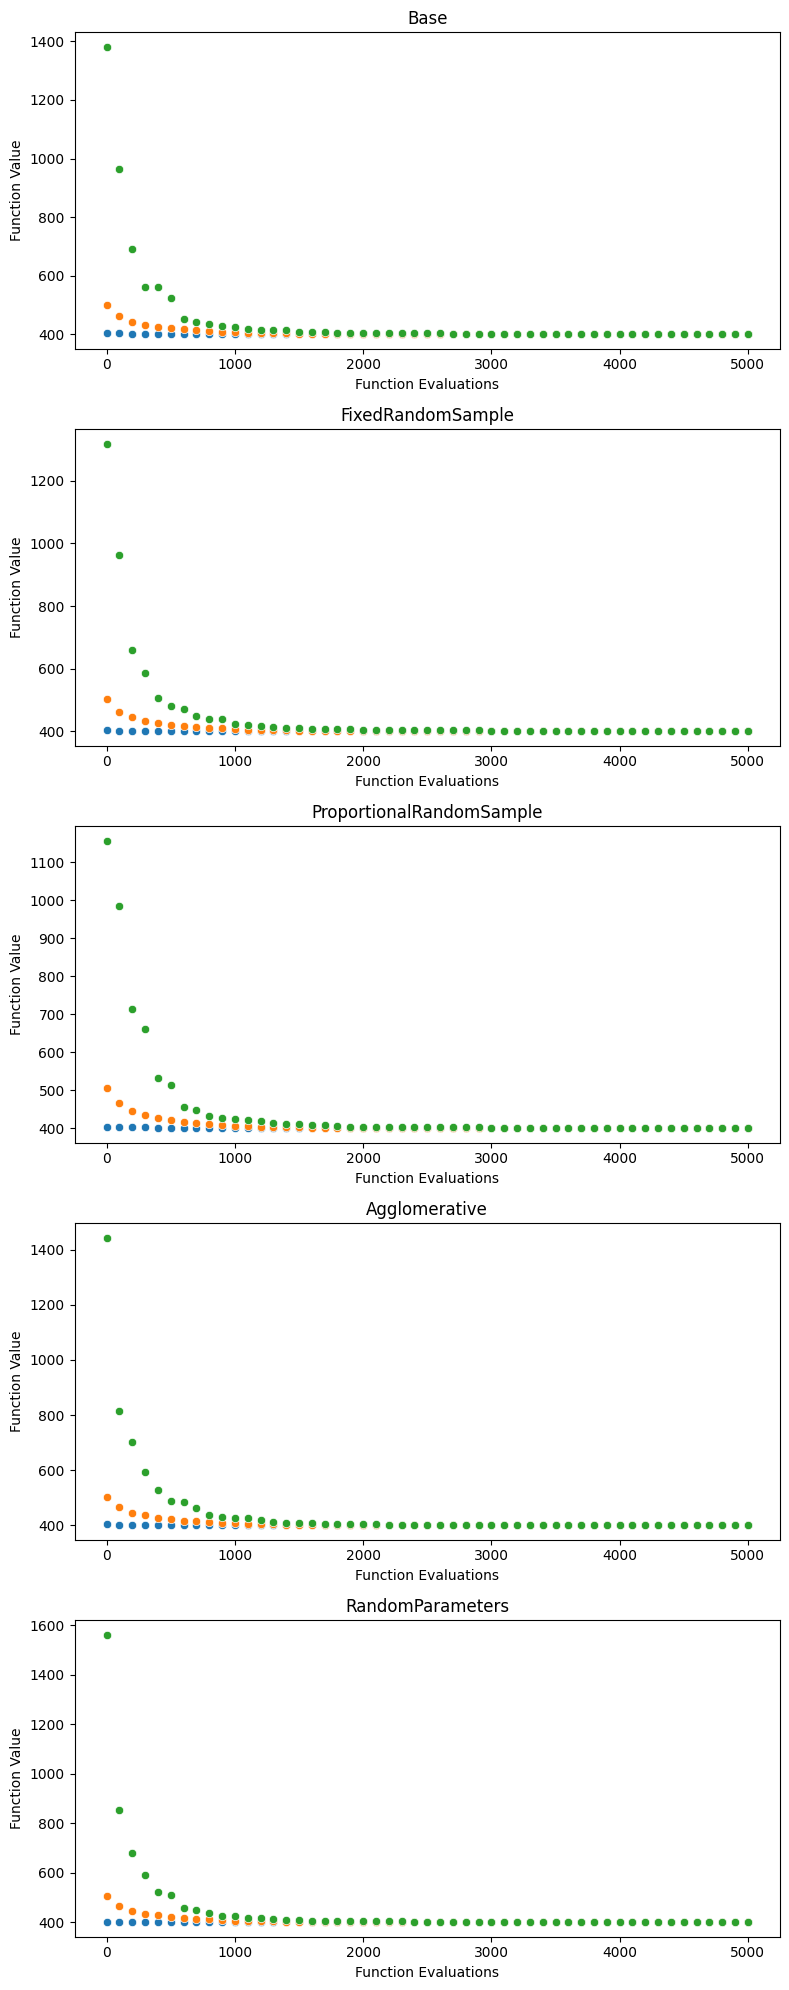

In [39]:
Plot_Min50Max(NumberFunction,FunctionEvaluations)

# F5

In [40]:
NumberFunction = 5
FunctionEvaluations = 100

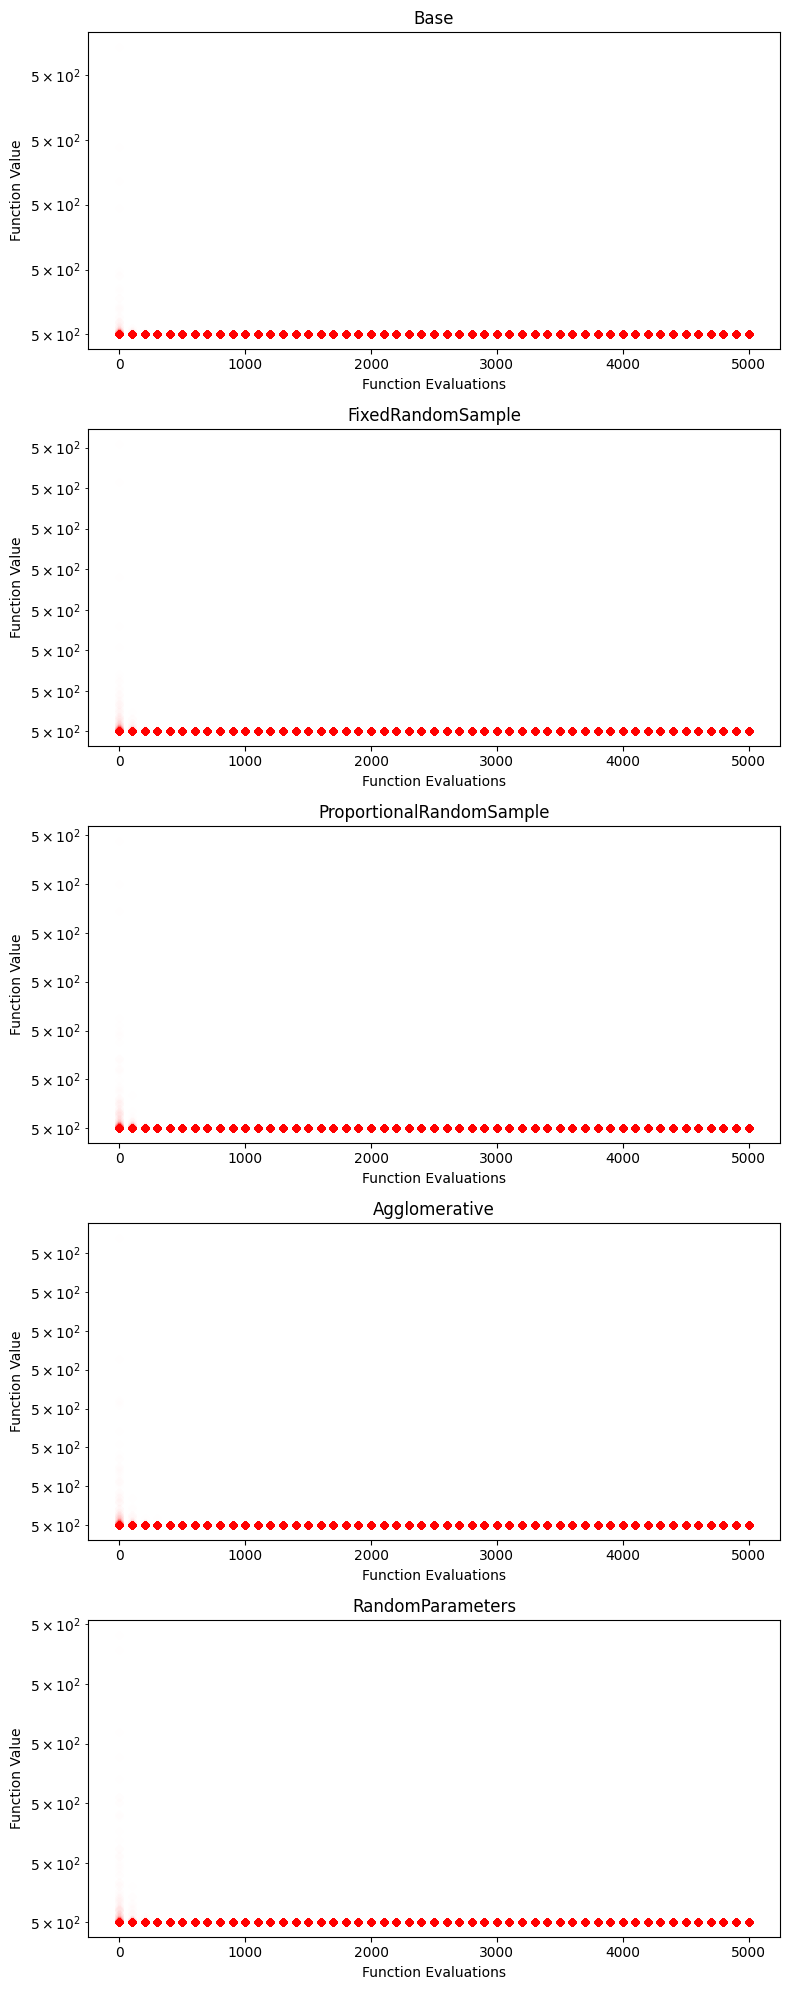

In [41]:
Plot_VariantResults(NumberFunction,FunctionEvaluations,Y_Scale='log')

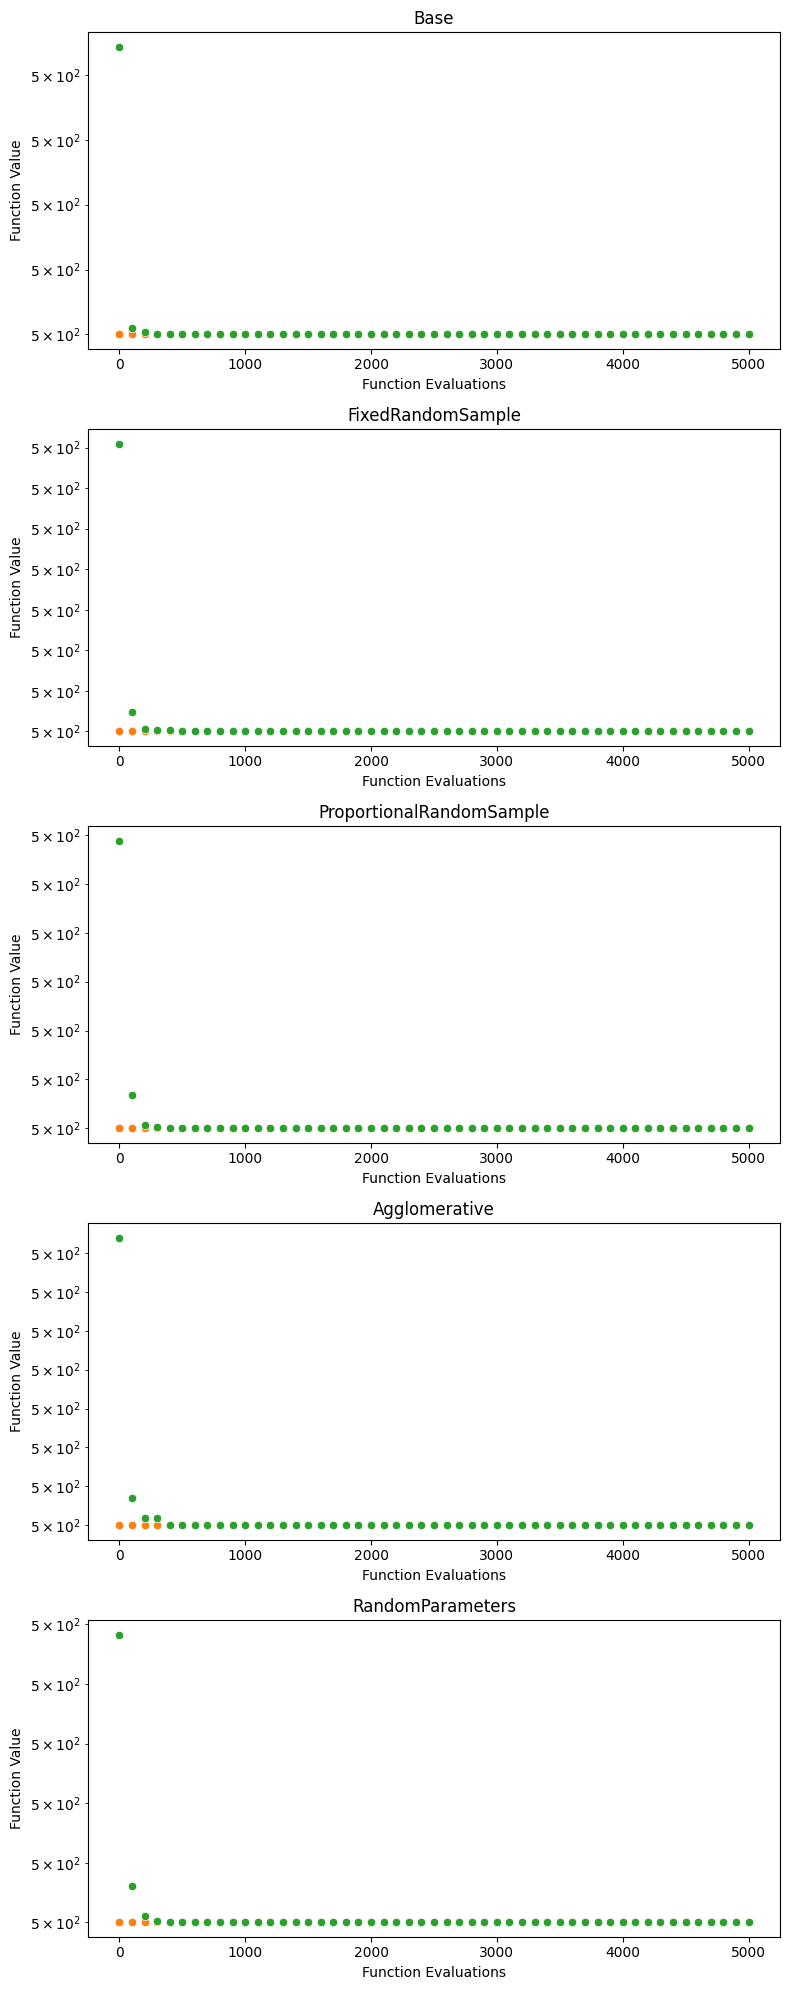

In [42]:
Plot_Min50Max(NumberFunction,FunctionEvaluations,Y_Scale='log')

# F6

In [43]:
NumberFunction = 6
FunctionEvaluations = 100

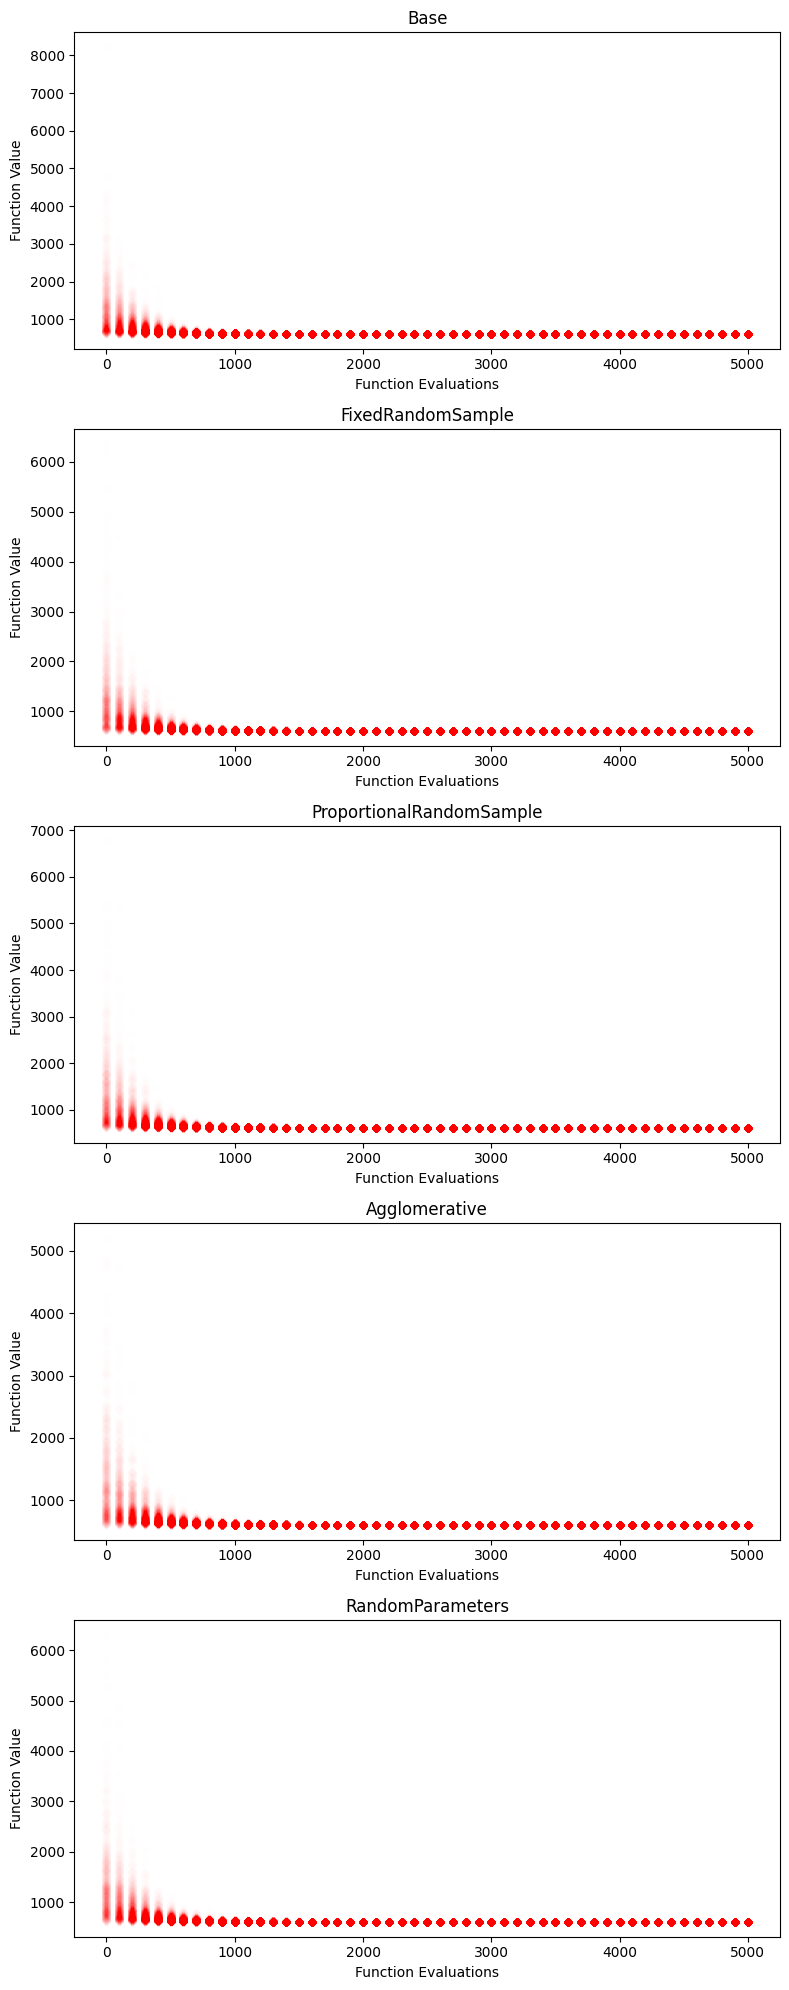

In [44]:
Plot_VariantResults(NumberFunction,FunctionEvaluations)

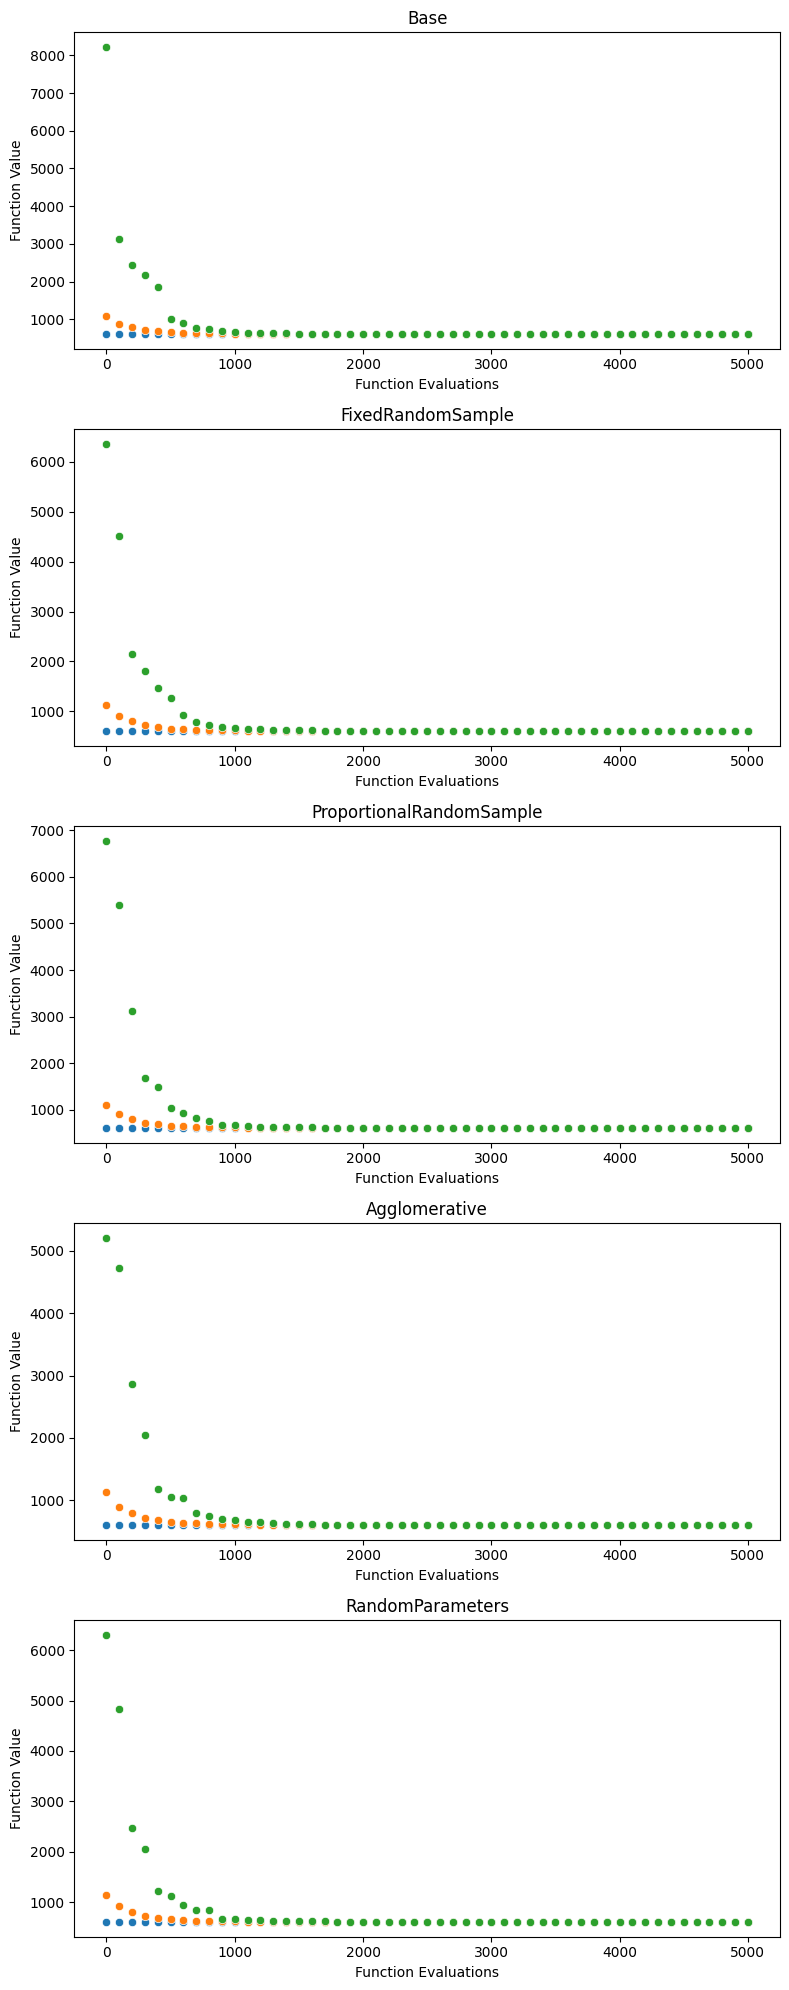

In [45]:
Plot_Min50Max(NumberFunction,FunctionEvaluations)

# F7

In [46]:
NumberFunction = 7
FunctionEvaluations = 100

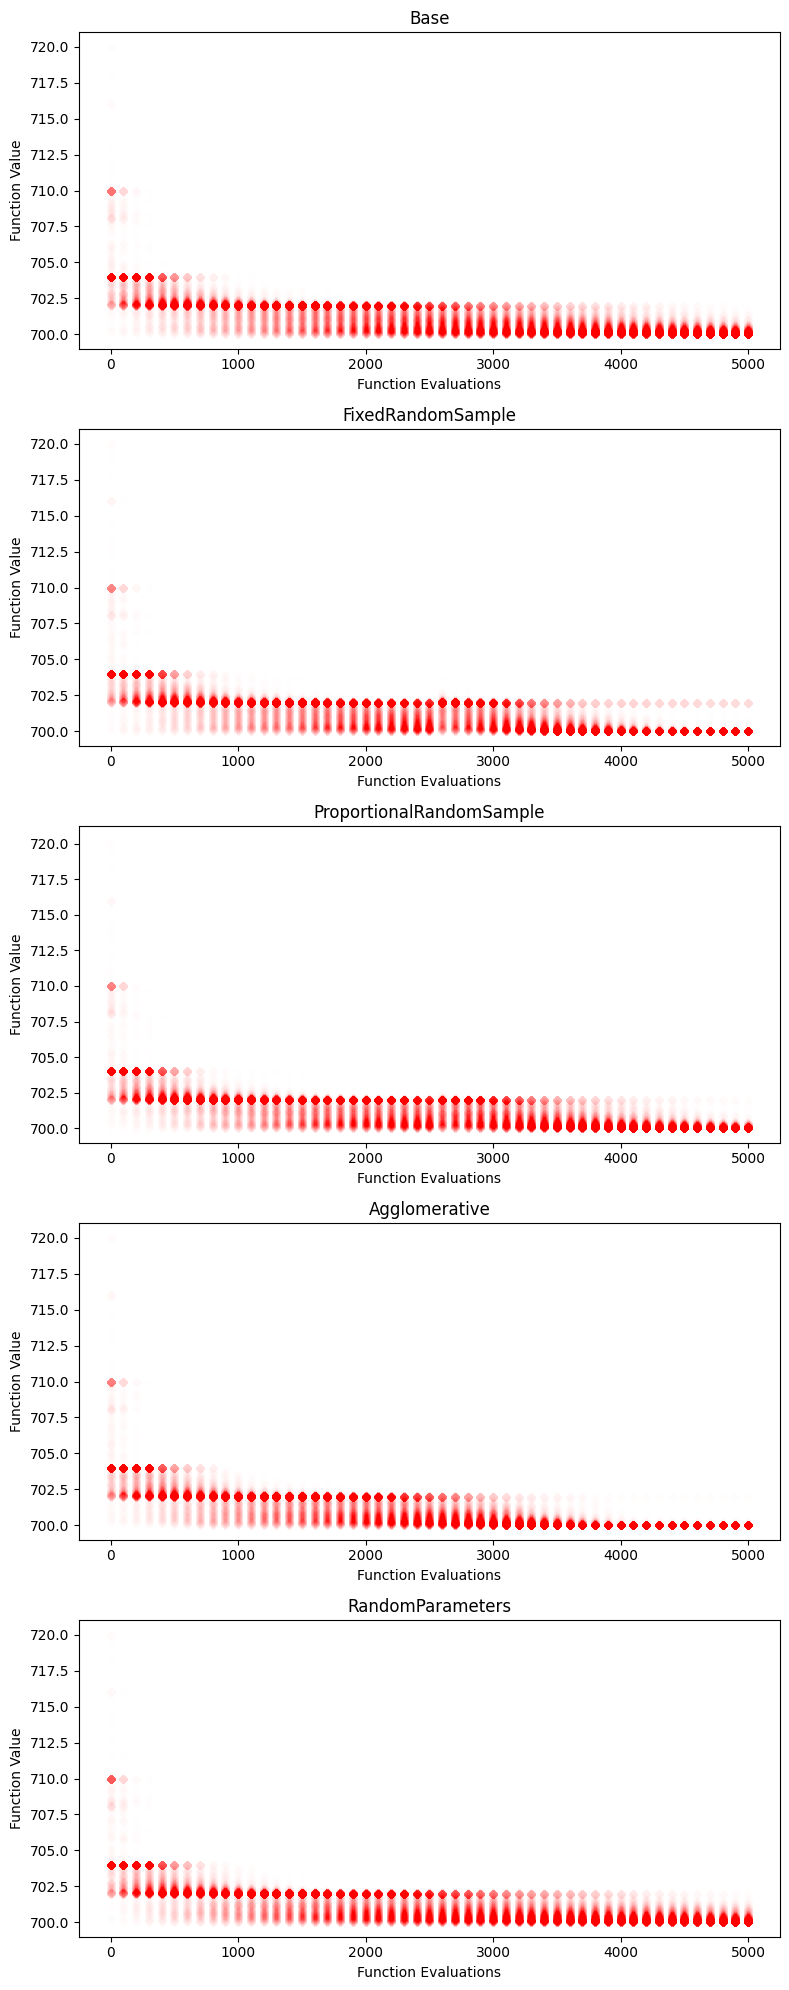

In [47]:
Plot_VariantResults(NumberFunction,FunctionEvaluations)

In [ ]:
Plot_Min50Max(NumberFunction,FunctionEvaluations)

# F8

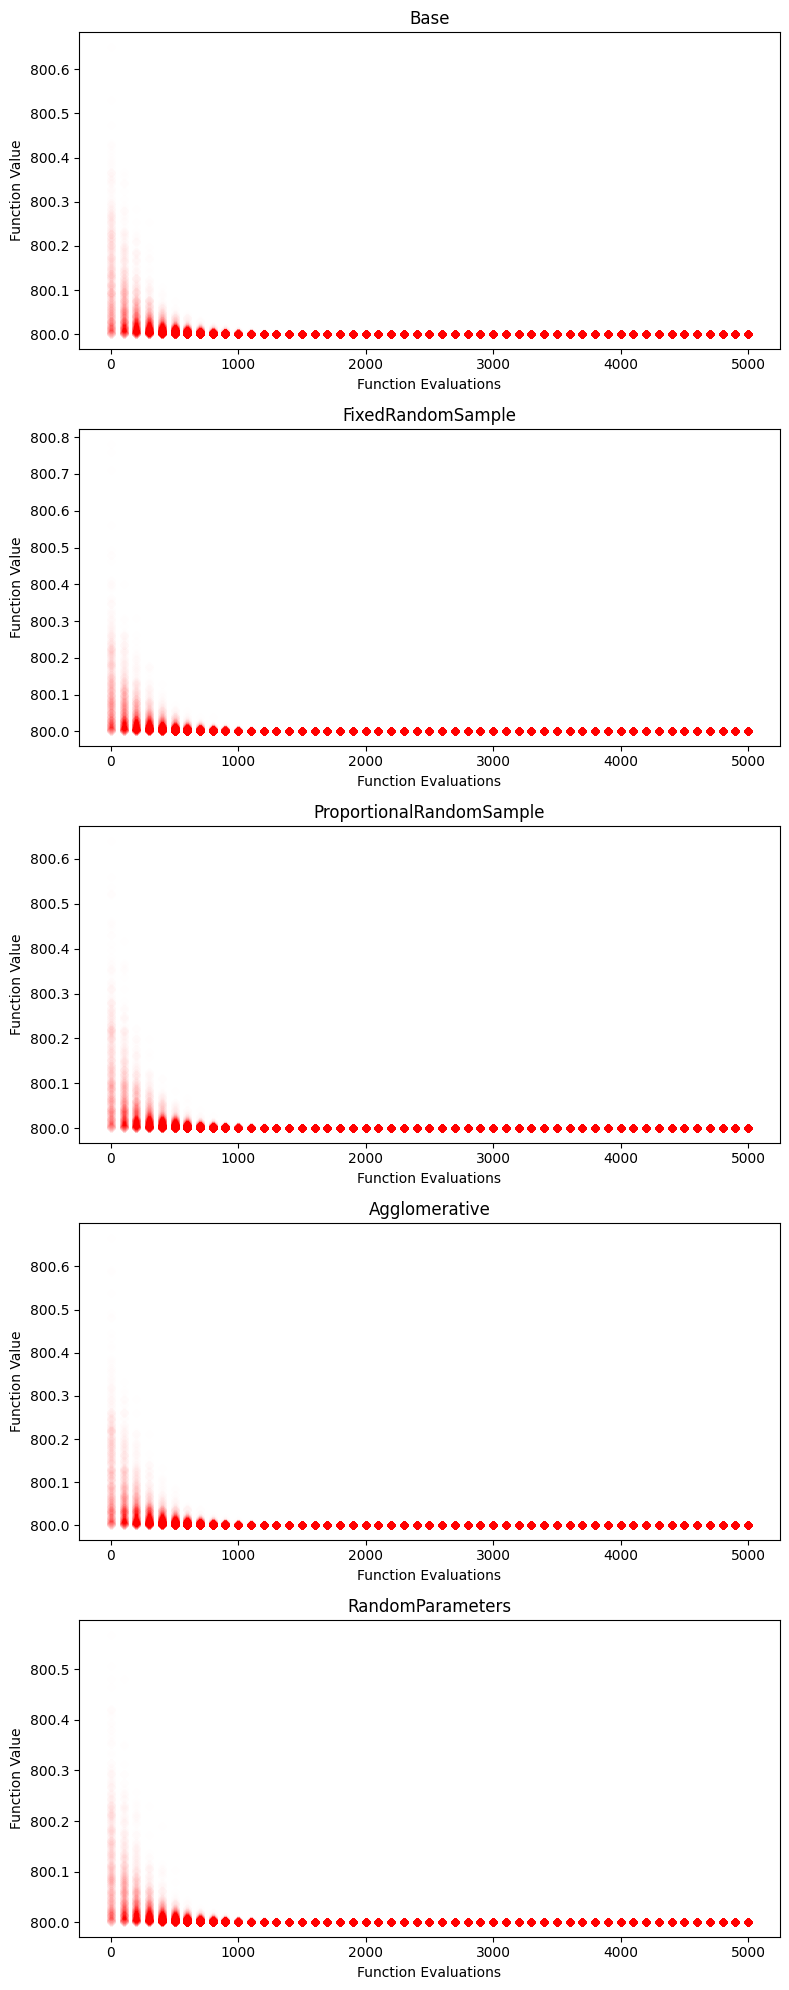

In [51]:
NumberFunction = 8
FunctionEvaluations = 100

Plot_VariantResults(NumberFunction,FunctionEvaluations)

# F9

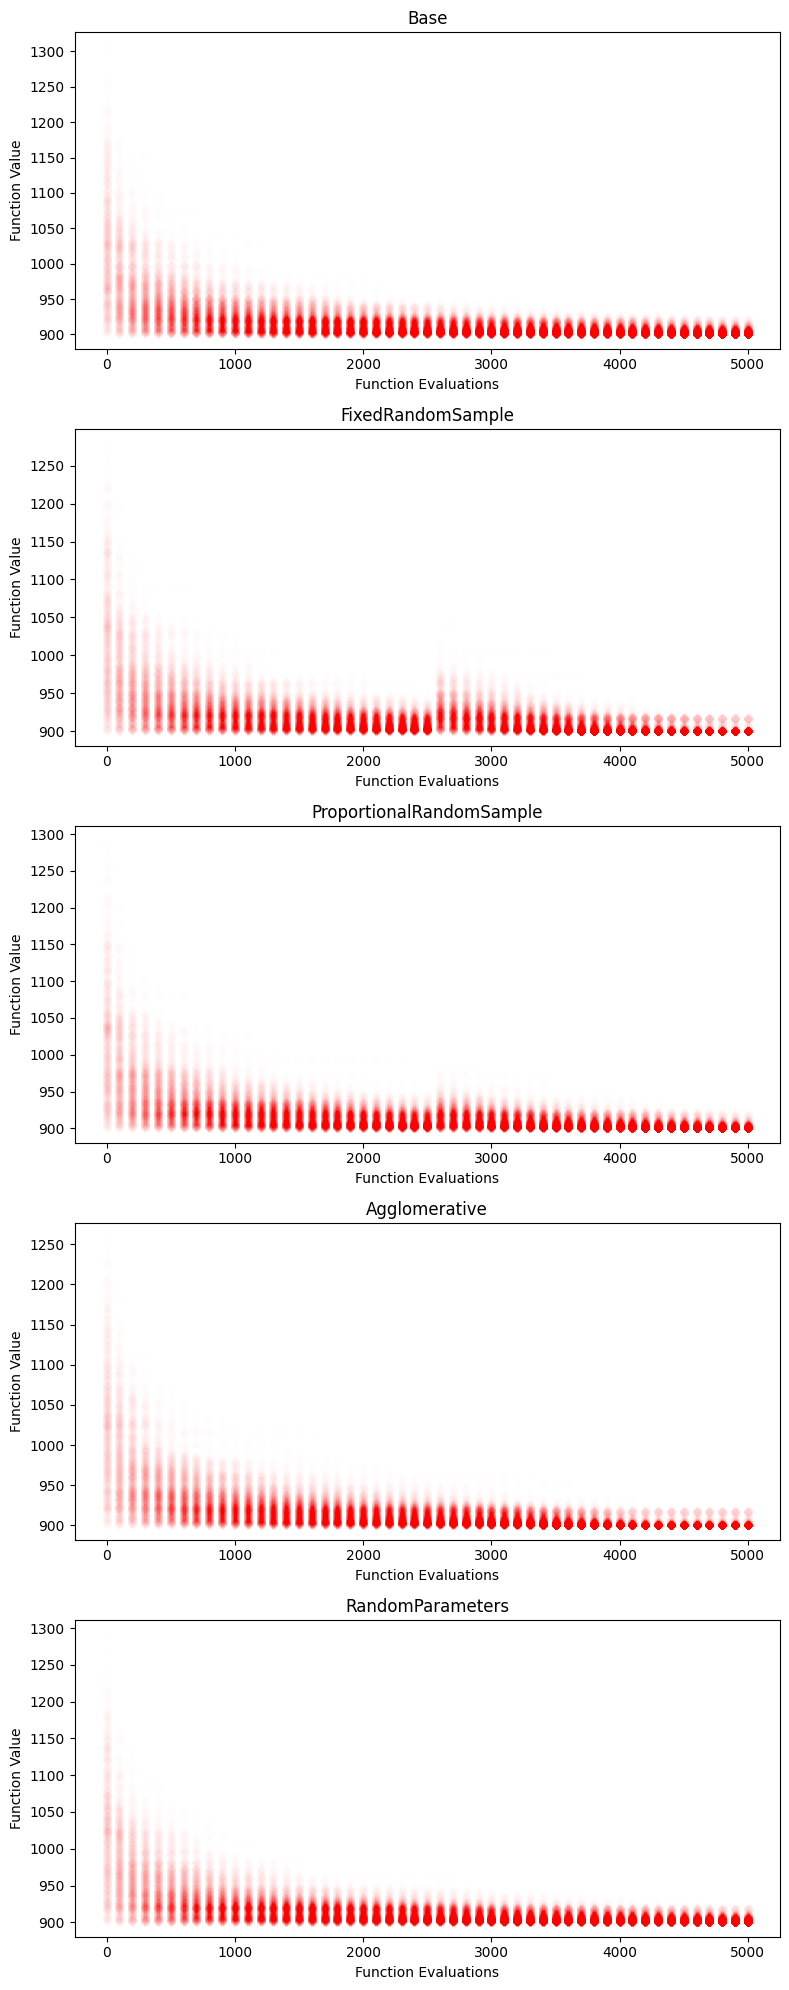

In [52]:
NumberFunction = 9
FunctionEvaluations = 100

Plot_VariantResults(NumberFunction,FunctionEvaluations)

# F20

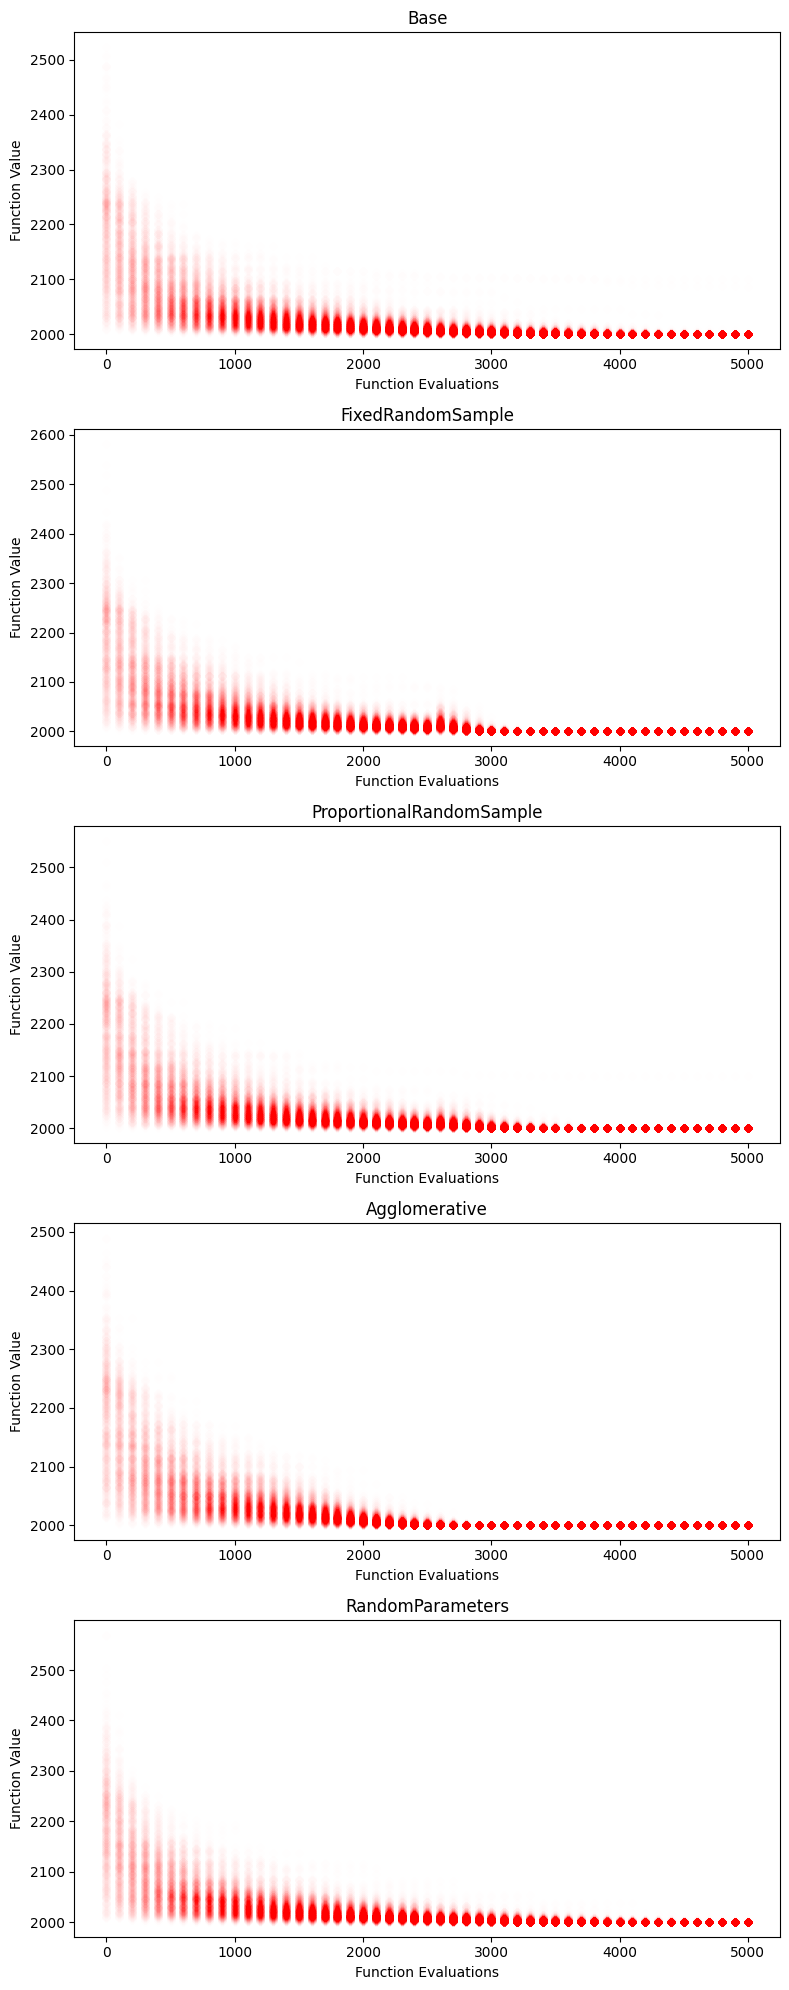

In [58]:
NumberFunction = 20
FunctionEvaluations = 100

Plot_VariantResults(NumberFunction,FunctionEvaluations)

# F21

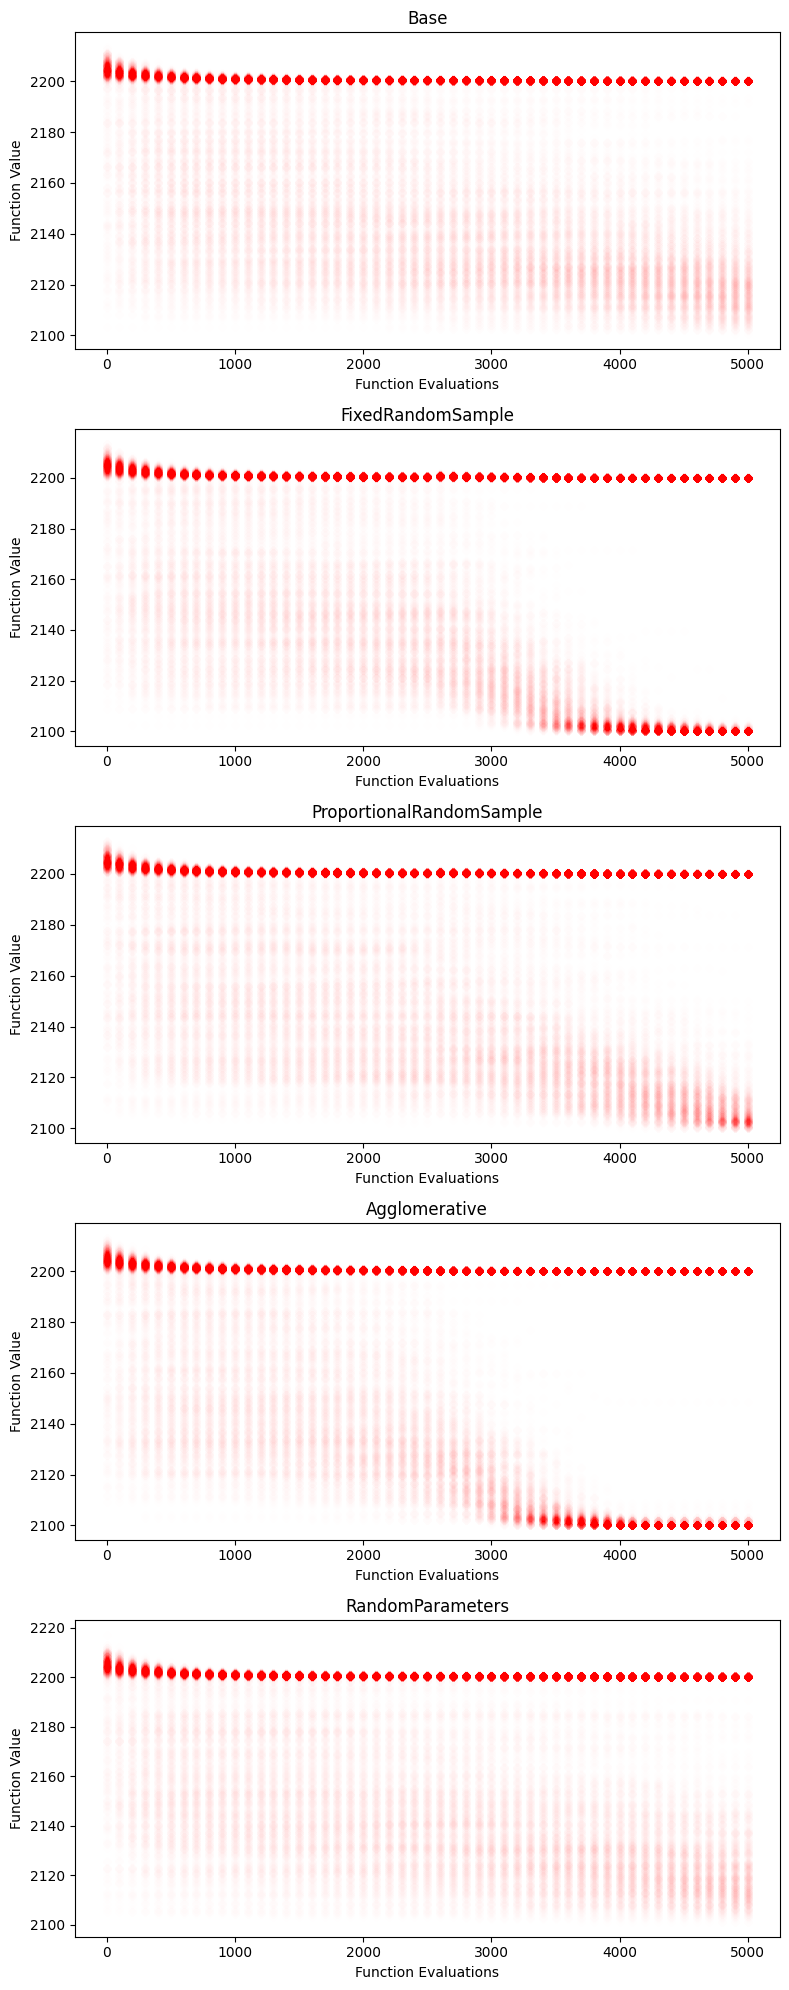

In [59]:
NumberFunction = 21
FunctionEvaluations = 100

Plot_VariantResults(NumberFunction,FunctionEvaluations)

# F22

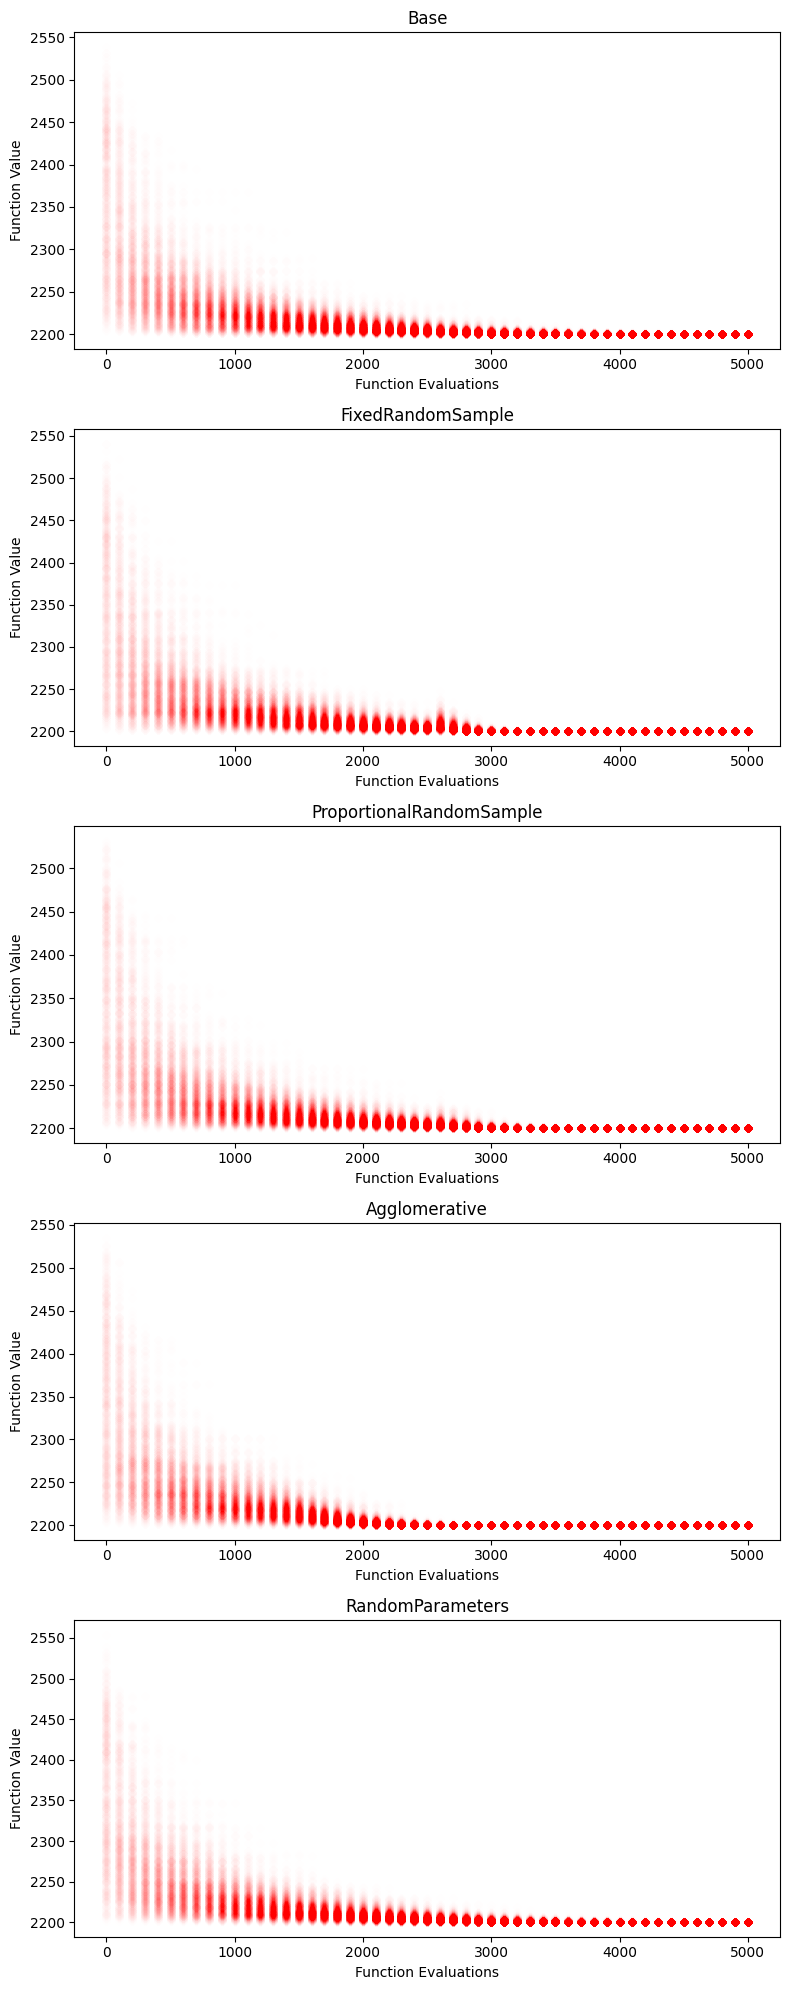

In [60]:
NumberFunction = 22
FunctionEvaluations = 100

Plot_VariantResults(NumberFunction,FunctionEvaluations)

# F23

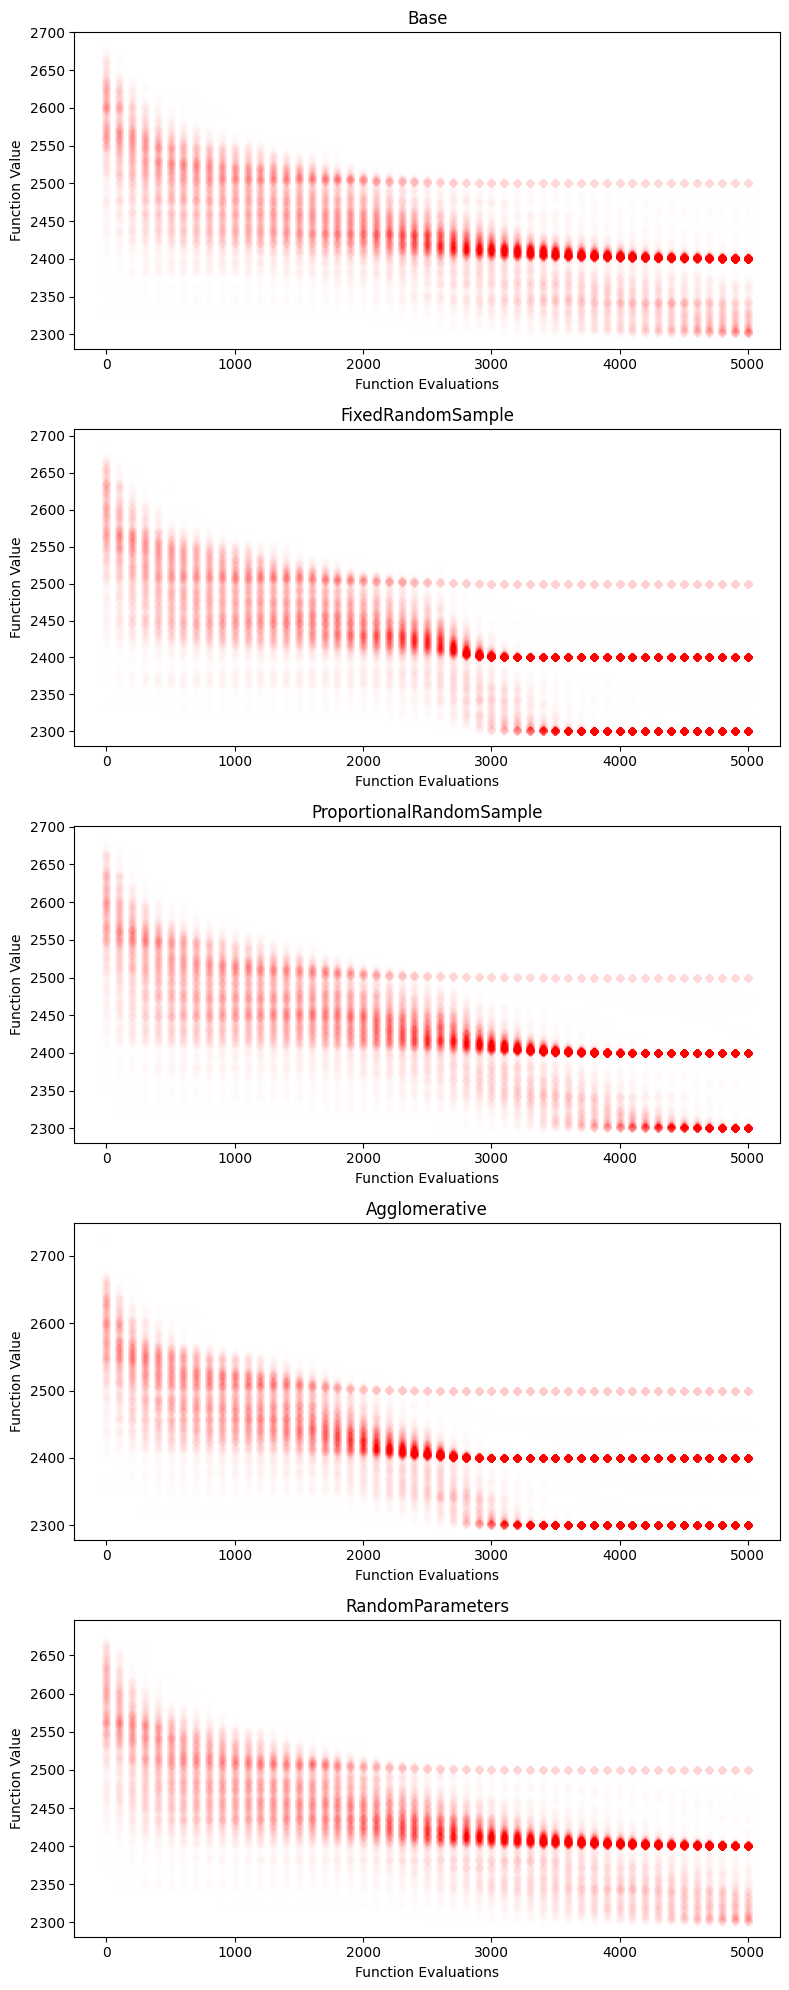

In [61]:
NumberFunction = 23
FunctionEvaluations = 100

Plot_VariantResults(NumberFunction,FunctionEvaluations)

# F24

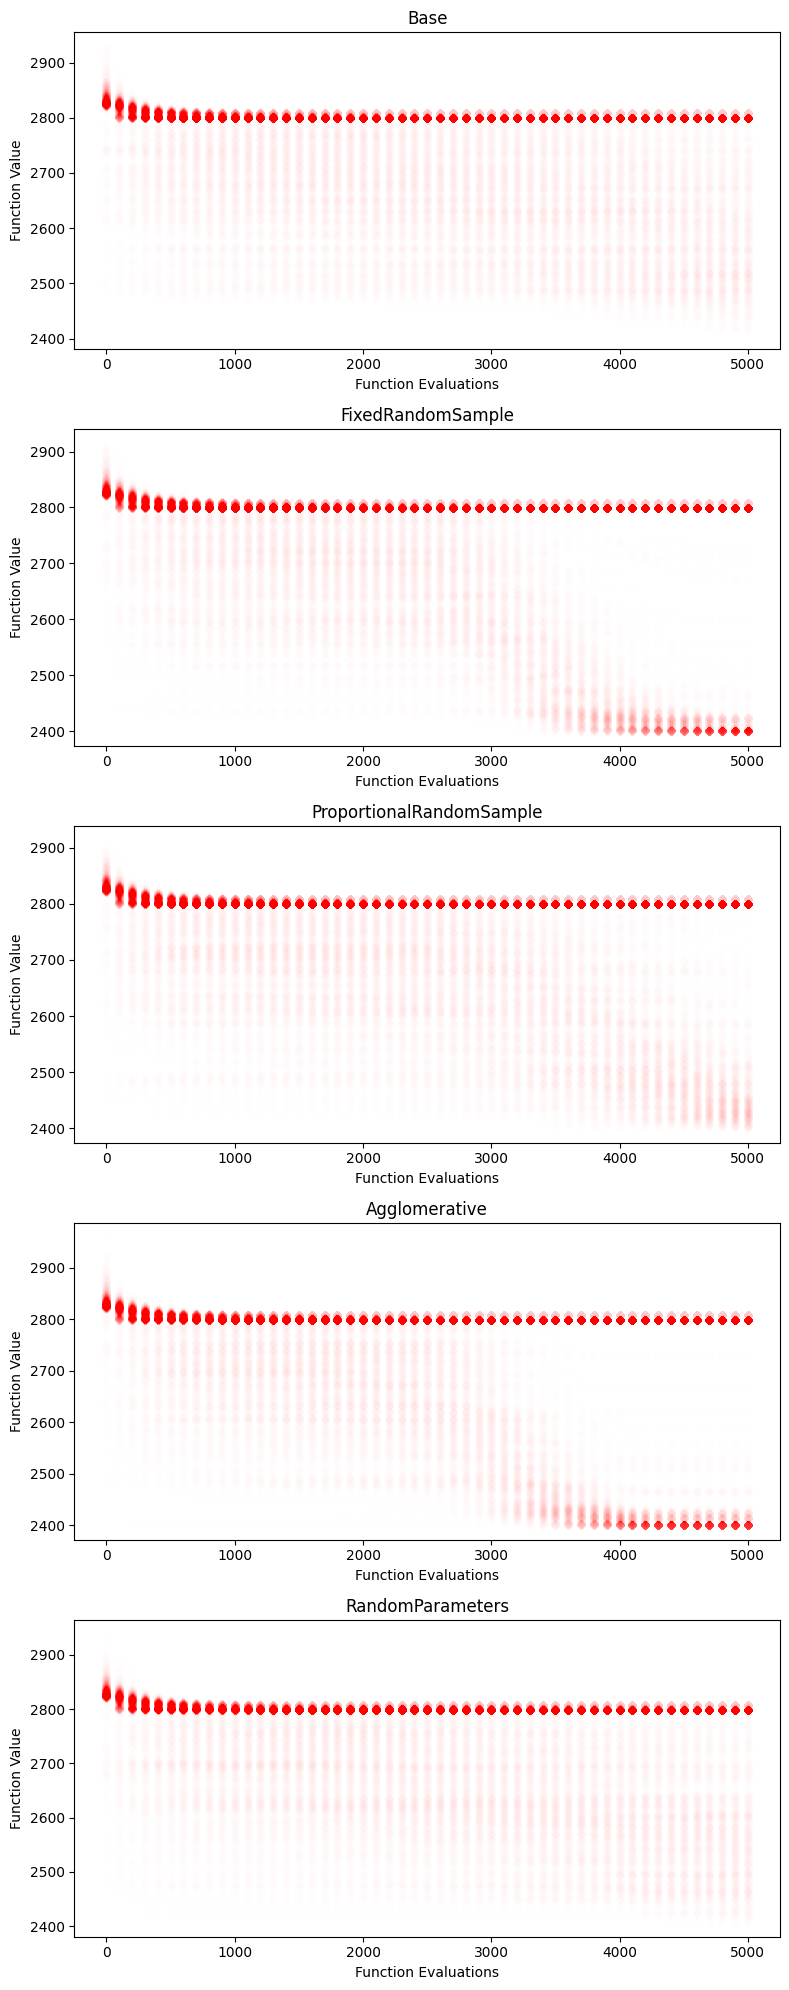

In [62]:
NumberFunction = 24
FunctionEvaluations = 100

Plot_VariantResults(NumberFunction,FunctionEvaluations)

# F25

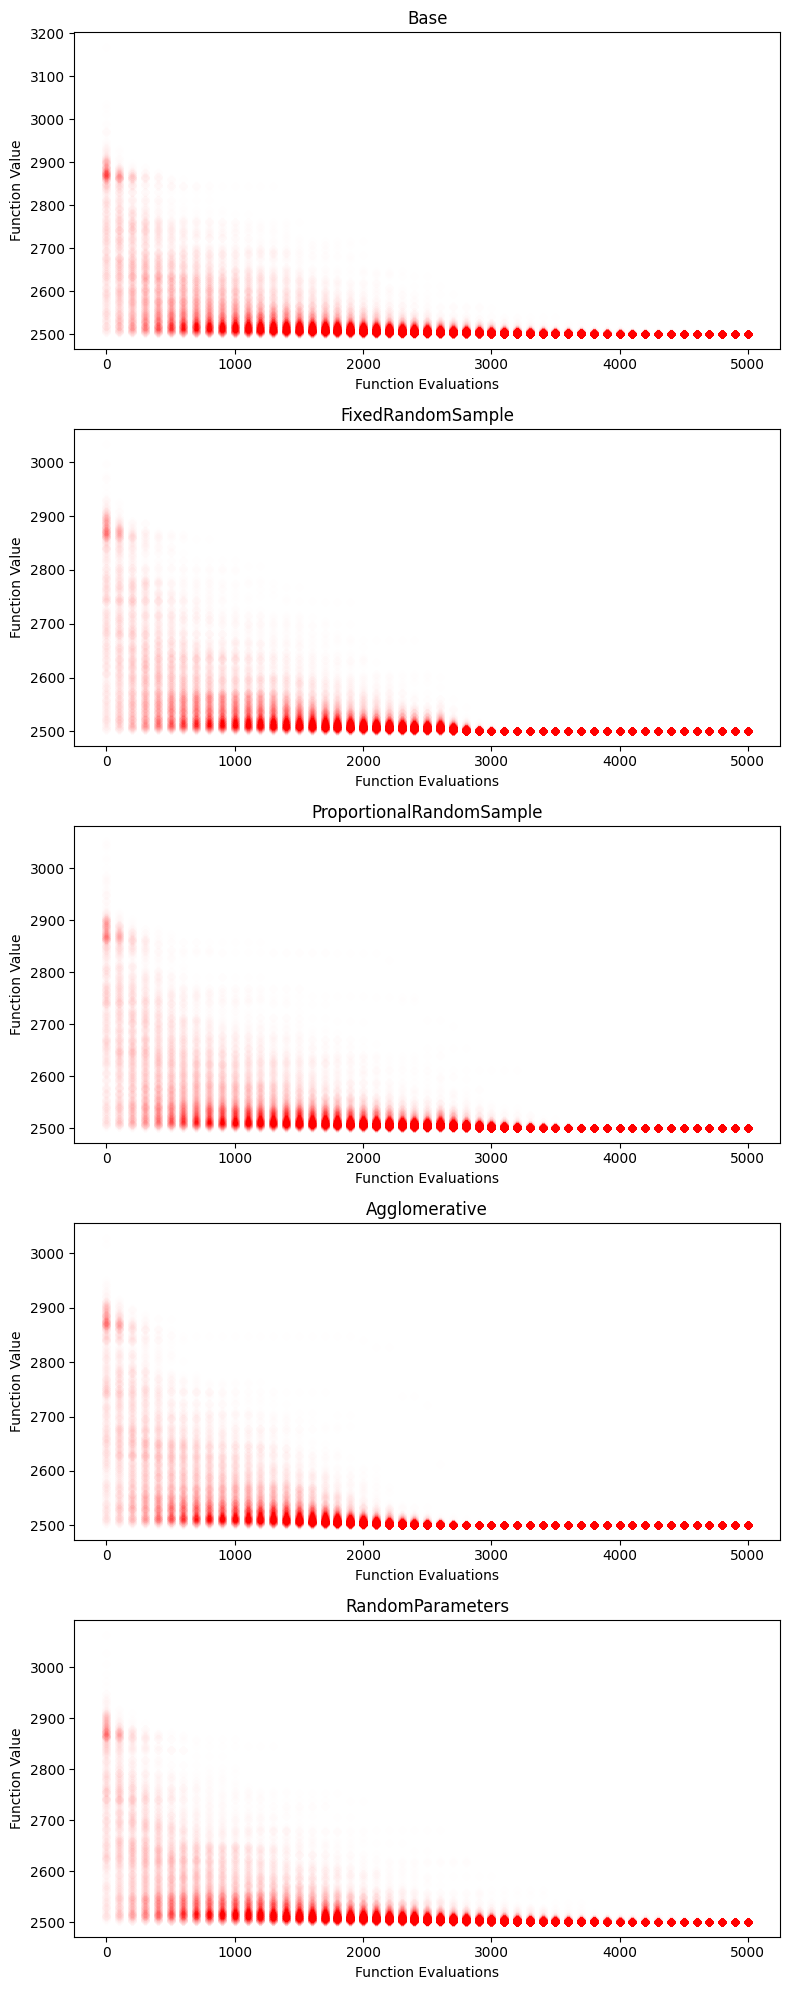

In [63]:
NumberFunction = 25
FunctionEvaluations = 100

Plot_VariantResults(NumberFunction,FunctionEvaluations)

# F26

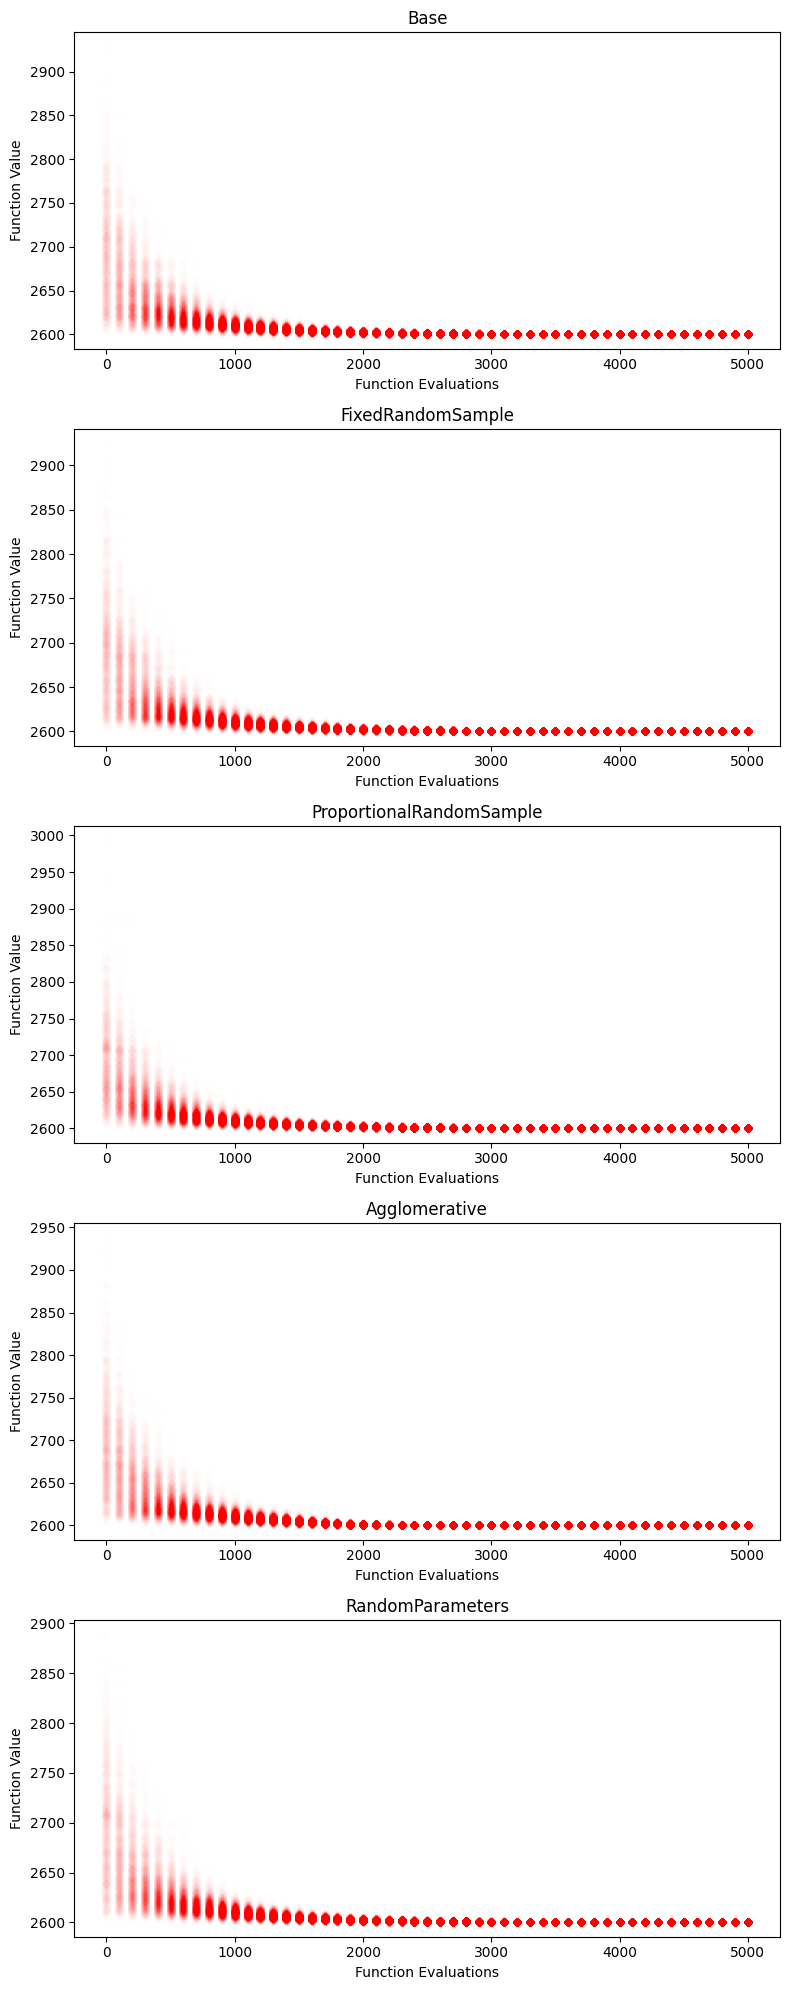

In [64]:
NumberFunction = 26
FunctionEvaluations = 100

Plot_VariantResults(NumberFunction,FunctionEvaluations)

# F27

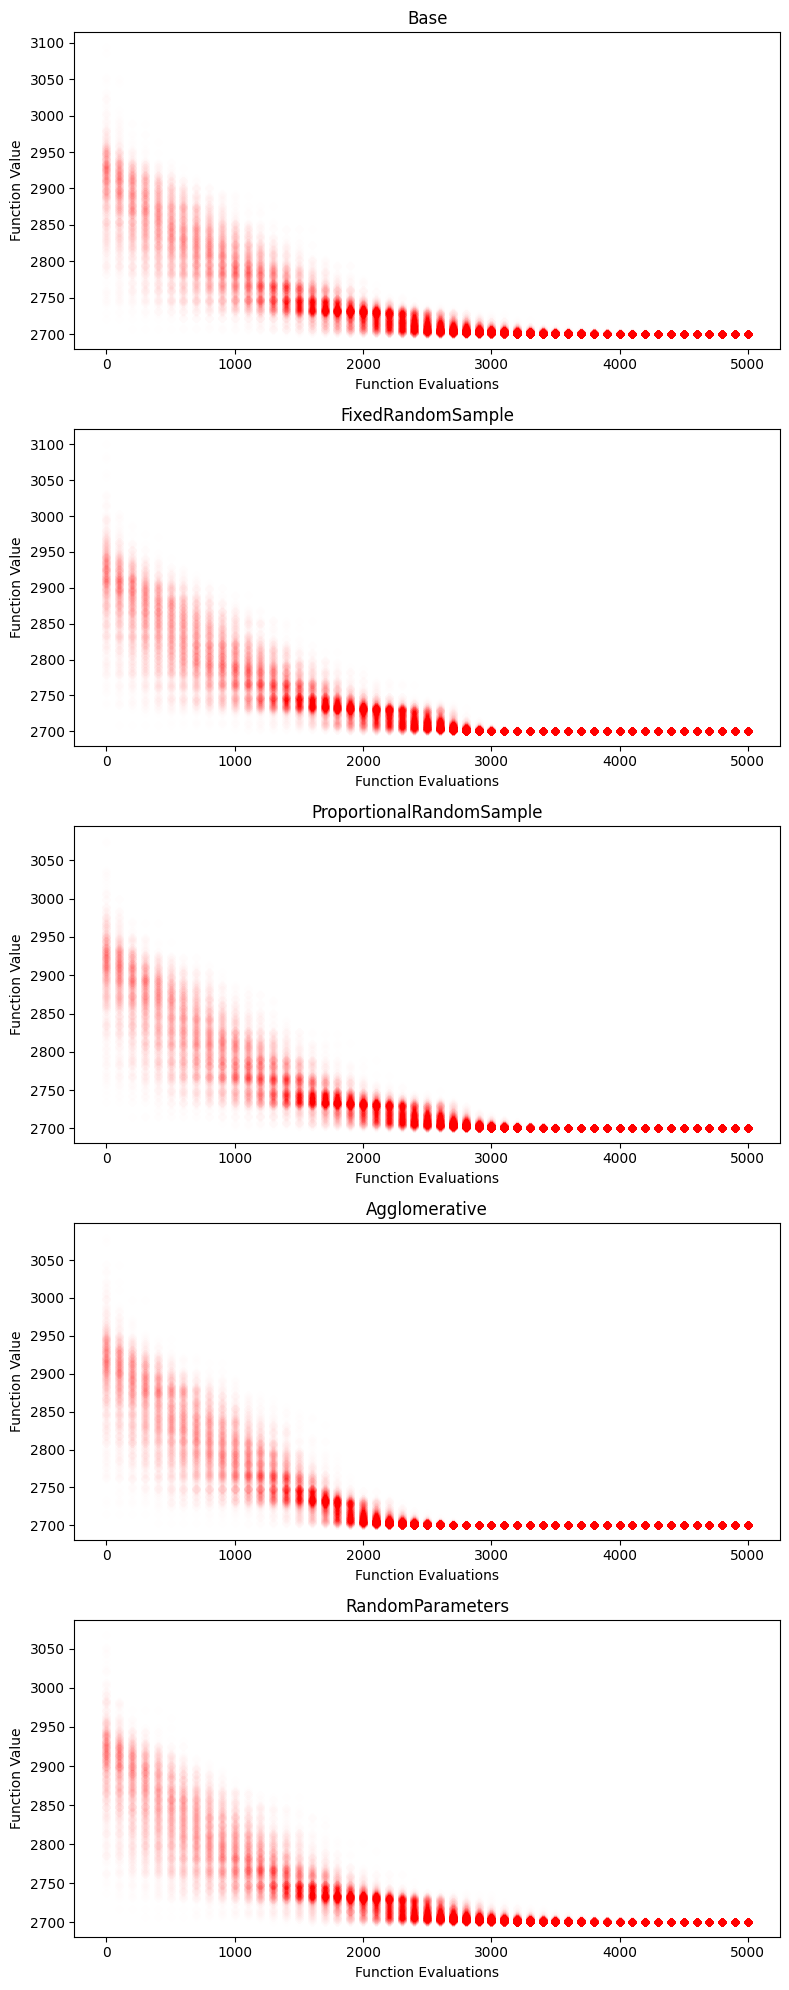

In [ ]:
NumberFunction = 27
FunctionEvaluations = 100

Plot_VariantResults(NumberFunction,FunctionEvaluations)